# Homework1

Please upload to Brightspace a **.zip** archive containing your Jupyter Notebook with solutions and all data required to reproduce your solutions. 

Please also prepare a **requirements.txt** file which lists all the packages that you have used for your homework, one package per line. This will allow us to install all required packages.

Please name your .zip archive using your full name and student id as follows - **Firstname_Lastname_12345678_COMP47350_Homework1.zip**. 

For your Notebook, please split the code and explanations into many little cells so it is easy to see and read the results of each step of your solution. Please remember to name your variables and methods with self-explanatory names. Please remember to write comments and where needed, justifications, for the decisions you make and code you write. Feel free to revisit *tips_to_keep_your_ipython_notebook_readable_and_easy_to_debug.html* provided on Brightspace.

Your code and analysis is like a story that awaits to be read, make it a nice story please. Always start with an introduction about the problem and your understanding of the problem domain and data analytics solution and describe the steps you do and your findings from each step.

The accepted file formats for the homework are:
    - .ipynb
    - .zip
    - .pdf
    - .csv
    
Please keep the whole code in a single notebook. Usage of external tools/files is discouraged for portability reasons. Files in any other format but mentioned above can be used but will not considered for the submission (including .doc, .rar, .7z, .pages, .xlsx, .tex etc.). 
Any image format is allowed to be used as far as the images appear embedded in your report (.ipynb or .pdf or .html).

**Deadline: Monday, 13 March, 2023, midnight.** 

## Exercises

This homework focuses on data understanding and preparation for a particular problem and dataset.
The data comes from the Centers for Disease Control and Prevention (CDC: https://covid.cdc.gov/covid-data-tracker/). CDC is a USA health protection agency and is in charge of collecting data about the COVID-19 pandemic, and in particular, tracking cases, deaths, and trends of COVID-19 in the United States. CDC collects and makes public deidentified individual-case data on a daily basis, submitted using standardized case reporting forms. In this analysis, we focus on using the data collected by CDC to build a data analytics solution for death risk prediction. CDC collects demographic characteristics, exposure history, disease severity indicators and outcomes, clinical data, laboratory diagnostic test results, and comorbidities. It also includes information on whether the individual survived or not.

The dataset we work with is a sample of the public data released by CDC, where the outcome for the target feature death_yn is known (i.e., either 'yes' or 'no'):
https://data.cdc.gov/Case-Surveillance/COVID-19-Case-Surveillance-Public-Use-Data-with-Ge/n8mc-b4w4

Each student will work with a different subset of the data. The CSV file is named using the format: **covid19-cdc-[your-student-number].csv**, e.g., **covid19-cdc-12345678.csv** is the data file for a student with number 12345678. You need to work with the CSV file corresponding to your student number, available from this link: https://drive.google.com/drive/folders/137_o3OVj8Y5C8-PCQlX-RpmHh439qe9U?usp=sharing. There are 4 parts for this homework. Each part has an indicative maximum percentage given in brackets, e.g., part (1) has a maximum of 40% shown as [40]. The total marks are then converted to a grade, e.g., 40% maps to a pass grade D-, 75% maps to a B.



(1). [40] Prepare a data quality report for your CSV file. Below you have a set of guideline steps to help you in this process. All the steps need to be implemented with Python code.

    - Check how many rows and columns your dataset has.
    - Print the first and the last 5 rows.
    - Convert the features to their appropriate data types (e.g., decide which features are more appropriate as 
    continuous and which ones as categorical types). 
    - Look for duplicate rows and columns. Consider whether it makes sense to keep them or drop them.
    - Look for constant columns. Consider whether it makes sense to keep them or drop them.
    - Save your updated/cleaned data frame to a new csv file.
  
    For the updated CSV and data frame (after column/row removal):
    - Prepare a table with descriptive statistics for all the continuous features.
    - Prepare a table with descriptive statistics for all the categorical features.
    - Plot histograms for all the continuous features.
    - Plot box plots for all the continuous features.
    - Plot bar plots for all the categorical features.
    - Discuss your initial findings from the tables and plots.
    - Save the initial discussion of your findings into a single data quality report PDF file. 
    The PDF report should focus on the key issues identified in the data and discuss potential strategies to handle them. Simple listing of tables and plots without discussion of findings will not receive full marks. To receive full marks you need to show your understanding and analysis of the dataset, through a detailed discussion for each feature. The report should be concise and complete, the goal is not to make it long for the sake of length, but to cover all the important aspects of the features.

(2). [30] Prepare a data quality plan for the cleaned CSV file. 

    - Mark down all the features where there are potential problems or data quality issues.
    - Propose solutions to deal with the problems identified. Explain why did you choose one solution over 
    potentially many other. It is very important to provide justification for your thinking in this part and to list potential solutions, including the solution that will be implemented to clean the data.
    - Apply your solutions to obtain a new CSV file where the identified data quality issues were addressed. 
    - Save the new CSV file with a self explanatory name. 
    - Save the data quality plan to a single PDF file.
        
(3). [15] Exploring relationships between feature pairs:

    - Choose a subset of features you find promising and plot pairwise feature interactions (e.g., 
    continuous-continuous feature plot or continuous-categorical plots or correlation plots). 
    Explain your choices.
    - Discuss your findings from the plots above. Do you find any features or feature combinations that are 
    indicative of the target outcome? Explain in plain words (a short paragraph) the story of your
    findings so far.
    
(4). [15] Transform, extend or combine the existing features to create a few new features (at least 3) with the aim to better capture the problem domain and the target outcome. Justify the steps and choices you are making. In the grading, consideration will be given to the creativity and domain knowledge shown in preparing the new features. Use code to show that your new features are indeed useful for the target prediction problem. Add these features to your clean dataset and save it as a CSV file with a self explanatory name. 

# Cian Belton 19321726 Homework 1 
## Data Analytics Solution for Death Risk Prediction

## Part 0 
### Background for this data analytics problem and dataset
Refer to the PDF report " " for terminology and background informtaion for this problem

In [2]:
#Import the required packages for this homework
#Import package pandas for data analysis
import pandas as pd
# Import package numpy for numeric computing
import numpy as np
#import for cramers statistcs
from scipy import stats
#for plotting further
import seaborn as sea

# Import package matplotlib for visualisation/plotting
import matplotlib.pyplot as plt

# For saving multiple plots into a single pdf file
from matplotlib.backends.backend_pdf import PdfPages

In [3]:
##Writing installed packages to requirements.txt file
!pip freeze > requirements.txt

## Part 1
### Data Quality Report for CSV file
#### Shape of CSV file
 

In [4]:
#Read from csv file into dataframe
df = pd.read_csv('covid19-cdc-19321726.csv', keep_default_na=True, delimiter=',', skipinitialspace=True)
#check the number of rows and columns in this data set
df.shape

(20000, 19)

My dataset has 2000 entries and 19 features
#### First and last 5 rows of CSV file

In [5]:
# Show data frame first 5 rows
df.head(5)

,case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,race,ethnicity,case_positive_specimen_interval,case_onset_interval,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
0,2021-01,FL,12.0,DUVAL,12031.0,65+ years,Male,Black,Non-Hispanic/Latino,0.0,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Yes,Missing,Yes,NaN
1,2020-12,ID,16.0,ADA,16001.0,65+ years,Male,White,Non-Hispanic/Latino,0.0,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,Yes,No,Yes,NaN
2,2022-01,NV,32.0,CLARK,32003.0,65+ years,Male,White,Hispanic/Latino,1.0,0.0,Routine surveillance,Missing,Laboratory-confirmed case,Symptomatic,Yes,Unknown,Yes,Yes
3,2020-03,LA,22.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,Yes,Yes,Yes,Yes
4,2021-01,KS,20.0,JOHNSON,20091.0,65+ years,Male,White,Non-Hispanic/Latino,NaN,NaN,Missing,Missing,Probable Case,Missing,Unknown,Missing,Yes,NaN


In [6]:
#Print last 5 rows
df.tail(5)

,case_month,res_state,state_fips_code,res_county,county_fips_code,age_group,sex,race,ethnicity,case_positive_specimen_interval,case_onset_interval,process,exposure_yn,current_status,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
19995,2020-10,FL,12.0,PINELLAS,12103.0,65+ years,Female,White,Hispanic/Latino,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Missing,No,Missing,No,NaN
19996,2022-01,WI,55.0,MARATHON,55073.0,0 - 17 years,Male,White,Hispanic/Latino,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Missing,No,Missing,No,NaN
19997,2022-01,NY,36.0,ONTARIO,36069.0,18 to 49 years,Female,White,Non-Hispanic/Latino,NaN,NaN,Missing,Missing,Laboratory-confirmed case,Missing,Missing,Missing,No,NaN
19998,2021-01,TX,48.0,WILLIAMSON,48491.0,18 to 49 years,Male,Unknown,Unknown,NaN,-1.0,Missing,Missing,Laboratory-confirmed case,Symptomatic,No,Missing,No,NaN
19999,2020-07,TN,47.0,DAVIDSON,47037.0,50 to 64 years,Female,White,Non-Hispanic/Latino,1.0,0.0,Missing,Yes,Laboratory-confirmed case,Symptomatic,No,No,No,Yes


#### Convert features to appropriate datatypes

In [7]:
#first get a summary of columns
#object means string
#info displays that we have some null values in the dataset
#and also the data type of each feature
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   case_month                       20000 non-null  object 
 1   res_state                        19999 non-null  object 
 2   state_fips_code                  19999 non-null  float64
 3   res_county                       18805 non-null  object 
 4   county_fips_code                 18805 non-null  float64
 5   age_group                        19850 non-null  object 
 6   sex                              19623 non-null  object 
 7   race                             17703 non-null  object 
 8   ethnicity                        17510 non-null  object 
 9   case_positive_specimen_interval  10539 non-null  float64
 10  case_onset_interval              8635 non-null   float64
 11  process                          20000 non-null  object 
 12  exposure_yn       

Based on examing the data in a spreadsheet 2 of the features are continuous and the rest are categorical.

Continuous data:
- case_positive_specimen_interval- contains any value over a range of weeks
- case_onset_interval- contains any value over a range of weeks

Categorical Data:
- case_month
- res_state
- state and county and fips codes
- age group
- sex
- ehtnicity
- process 
- exposure
- status
- hosp
- icu
- death
- conditions


There are a lot of null values for:
- case_positive_specimen_interval
- case_onset_interval
- underlying_conditions

These columns may be dropped later on


In [8]:
# Select columns containing categorical data
categorical_columns = df[['case_month','res_state','state_fips_code','res_county','county_fips_code','age_group','sex','race','ethnicity','process','exposure_yn','current_status','symptom_status','hosp_yn','icu_yn','death_yn','underlying_conditions_yn']].columns

# Convert data type to category for these columns
for column in categorical_columns:
    df[column] = df[column].astype('category')  

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   case_month                       20000 non-null  category
 1   res_state                        19999 non-null  category
 2   state_fips_code                  19999 non-null  category
 3   res_county                       18805 non-null  category
 4   county_fips_code                 18805 non-null  category
 5   age_group                        19850 non-null  category
 6   sex                              19623 non-null  category
 7   race                             17703 non-null  category
 8   ethnicity                        17510 non-null  category
 9   case_positive_specimen_interval  10539 non-null  float64 
 10  case_onset_interval              8635 non-null   float64 
 11  process                          20000 non-null  category
 12  expo

#### Cleaning continuous data

In [9]:

##Will handle non-finite values for case_pos and case_onset columns:
# replace non-finite values with a default value like -1 for code to work
df[['case_positive_specimen_interval','case_onset_interval']] = df[['case_positive_specimen_interval','case_onset_interval']].fillna(-1)

# Select columns containing continuous data
continuous_columns = df[['case_positive_specimen_interval','case_onset_interval']].columns


# Convert data type to int
for column in continuous_columns:
    df[column] = df[column].astype('int64')  

df.dtypes

case_month                         category
res_state                          category
state_fips_code                    category
res_county                         category
county_fips_code                   category
age_group                          category
sex                                category
race                               category
ethnicity                          category
case_positive_specimen_interval       int64
case_onset_interval                   int64
process                            category
exposure_yn                        category
current_status                     category
symptom_status                     category
hosp_yn                            category
icu_yn                             category
death_yn                           category
underlying_conditions_yn           category
dtype: object

Converted case_positive_specimen_interval and case_onset_interval to int 64 by handling null values

### Check for duplicate rows/columns

In [10]:
#Print the number of duplicates, without the original rows that were duplicated
print('Number of duplicate (excluding first) rows in the table is: ', df.duplicated().sum())

# Check for duplicate rows. 
# Use "keep=False" to mark all duplicates as true, including the original rows that were duplicated.
print('Number of duplicate rows (including first) in the table is:', df[df.duplicated(keep=False)].shape[0])

Number of duplicate (excluding first) rows in the table is:  1064
Number of duplicate rows (including first) in the table is: 1890


In [11]:
# Check for duplicate columns
#First transpose the df so columns become rows, then apply the same check as above
dfT = df.T
print("Number of duplicate (excluding first) columns in the table is: ", dfT.duplicated().sum())
print("Number of duplicate (including first) columns in the table is: ",  dfT[dfT.duplicated(keep=False)].shape[0])

Number of duplicate (excluding first) columns in the table is:  0
Number of duplicate (including first) columns in the table is:  0


#### Result - Duplicate rows exist

- Rows - I compared against all column attributes as there was no primary key. This acts like a primary key proxy. This returns 1064 duplicate rows. However these duplicate rows do not indicate duplicate people as there is no unique identifier for each row.

Do not drop these rows yet. They might not be duplicate rows as there is no unique identifier for each row. For example, 2 people who live in the same county catch covid in the same month and they are of the same race, gender and age range. They also have the same underlying conditions, so it appears as a duplicate row. However, they are not the same person.

- Columns - There are no duplicate columns.

In [12]:
# Show some of the duplicate data that was found
dup=df[df.duplicated(keep=False)]

groups=dup.groupby(list(dup.case_month)).groups
for group_name, group_indices in groups.items():
    print(f"Group {group_name}:")
    print(df.loc[group_indices])
    print()


Group 2020-01:
     case_month res_state state_fips_code res_county county_fips_code  \
829     2020-01        GA            13.0        NaN              NaN   
956     2020-01        GA            13.0     COFFEE          13069.0   
3314    2020-01        GA            13.0     COFFEE          13069.0   
3413    2020-01        GA            13.0        NaN              NaN   

     age_group  sex race ethnicity  case_positive_specimen_interval  \
829        NaN  NaN  NaN       NaN                               -1   
956        NaN  NaN  NaN       NaN                               -1   
3314       NaN  NaN  NaN       NaN                               -1   
3413       NaN  NaN  NaN       NaN                               -1   

      case_onset_interval  process exposure_yn             current_status  \
829                    -1  Missing     Missing  Laboratory-confirmed case   
956                    -1  Missing     Missing  Laboratory-confirmed case   
3314                   -1  Missi

### Check for constant columns

In [13]:
# Print table with categorical statistics
df.select_dtypes(['category']).describe().T

,count,unique,top,freq
case_month,20000,34,2022-01,2665
res_state,19999,48,NY,2144
state_fips_code,19999.0,48.0,36.0,2144.0
res_county,18805,865,MIAMI-DADE,376
county_fips_code,18805.0,1214.0,12086.0,376.0
age_group,19850,5,18 to 49 years,7740
sex,19623,4,Female,10035
race,17703,8,White,12389
ethnicity,17510,4,Non-Hispanic/Latino,11959
process,20000,9,Missing,18311


**Categorical Data** - Reviewing the categorical data above I can see all unique values > 1 so there are no constant columns

### Check for Null, -1, Missing and Unknown Values

In [14]:
df.isnull().sum()

case_month                             0
res_state                              1
state_fips_code                        1
res_county                          1195
county_fips_code                    1195
age_group                            150
sex                                  377
race                                2297
ethnicity                           2490
case_positive_specimen_interval        0
case_onset_interval                    0
process                                0
exposure_yn                            0
current_status                         0
symptom_status                         0
hosp_yn                                0
icu_yn                                 0
death_yn                               0
underlying_conditions_yn           18299
dtype: int64

In [15]:
df.eq('Missing').sum()

case_month                             0
res_state                              0
state_fips_code                        0
res_county                             0
county_fips_code                       0
age_group                             34
sex                                   22
race                                 732
ethnicity                           1081
case_positive_specimen_interval        0
case_onset_interval                    0
process                            18311
exposure_yn                        17250
current_status                         0
symptom_status                      8358
hosp_yn                             4336
icu_yn                             15446
death_yn                               0
underlying_conditions_yn               0
dtype: int64

In [16]:
df.eq('Unknown').sum()

case_month                            0
res_state                             0
state_fips_code                       0
res_county                            0
county_fips_code                      0
age_group                             0
sex                                  85
race                               1715
ethnicity                          2736
case_positive_specimen_interval       0
case_onset_interval                   0
process                              57
exposure_yn                         799
current_status                        0
symptom_status                     2233
hosp_yn                            2338
icu_yn                             2776
death_yn                              0
underlying_conditions_yn              0
dtype: int64

In [17]:
df.eq(-1).sum()

case_month                             0
res_state                              0
state_fips_code                        0
res_county                             0
county_fips_code                       0
age_group                              0
sex                                    0
race                                   0
ethnicity                              0
case_positive_specimen_interval     9486
case_onset_interval                11532
process                                0
exposure_yn                            0
current_status                         0
symptom_status                         0
hosp_yn                                0
icu_yn                                 0
death_yn                               0
underlying_conditions_yn               0
dtype: int64

In [18]:
df.isnull().sum()+df.eq('Missing').sum()+df.eq('Unknown').sum()+df.eq(-1).sum()

case_month                             0
res_state                              1
state_fips_code                        1
res_county                          1195
county_fips_code                    1195
age_group                            184
sex                                  484
race                                4744
ethnicity                           6307
case_positive_specimen_interval     9486
case_onset_interval                11532
process                            18368
exposure_yn                        18049
current_status                         0
symptom_status                     10591
hosp_yn                             6674
icu_yn                             18222
death_yn                               0
underlying_conditions_yn           18299
dtype: int64

- The 4 types of data that indicate incompletness are:
    - Null
    - -1
    - Missing
    - Unknown

- So for this reason I aggregated all of these into the output from the above cell. This is because I want to see if there are any columns that have a lot of missing data. Which might be a good indicator to drop the column.

- Features of note (due to lage amounts of missing data) are:
    - process: The process under which the case was identified. This is a categorical feature with 9 unique values. It is probably a good idea to drop this column as it is not useful for the prediction of death risk.
    
    - exposure_yn: Whether or not the person had known exposure to COVID-19. This is a categorical feature with 3 unique values. Again this is not useful for the prediction of death risk as the only way to contract the virus is through exposure.

    - case_positive_specimen_interval: The time interval in weeks between the date a person's specimen was collected and the date their COVID-19 test result was reported as positive. This is a continuous feature with a range of values. I think that this feature is not useful for the prediction of death risk as this interval has no connection to the death risk.

    - case_onset_interval: The time interval in weeks between the date a person is believed to have become infected with the virus and the date their COVID-19 test result is reported as positive. This is a continuous feature with a range of values. Similarly to the specimen interval I think that this feature is not useful for the prediction of death risk as it is measured in weeks which is too large of a range for this feature to be useful. 

    - symptom_status: The status of the person's symptoms. This is a categorical feature with 4 unique values. This feature may be useful for the prediction of death risk.

    - icu_yn: Whether or not the person was admitted to the ICU. This is a categorical feature with 2 unique values. This feature will likely be useful for the prediction of death risk.

    - underlying_conditions_yn: Whether or not the person had any underlying conditions. This is a categorical feature with 2 unique values. This feature will likely be useful for the prediction of death risk.

### Check for irregular cardinalities and permitted values


In [19]:
##check state and county codes first
col=categorical_columns[1:5]

for column in col:
    print("\n" + column)
    print(df[column].value_counts(normalize=True))


res_state
NY    0.107205
NC    0.089804
NJ    0.088354
FL    0.078904
IN    0.054653
TX    0.053653
OH    0.053153
MN    0.049402
CA    0.038502
MD    0.034652
KY    0.033702
AZ    0.026451
MI    0.026201
KS    0.024851
PA    0.023401
VA    0.019801
SC    0.016151
WI    0.014401
IL    0.013401
NV    0.013301
MA    0.012701
OR    0.012101
OK    0.011701
TN    0.011701
UT    0.011501
ID    0.008900
ME    0.008900
AR    0.008050
CO    0.007300
AL    0.005750
RI    0.005550
MT    0.005050
MO    0.004000
CT    0.004000
DC    0.003150
WA    0.003100
NH    0.002900
IA    0.002600
NM    0.002100
PR    0.001900
LA    0.001450
VT    0.001250
WY    0.001250
MS    0.001100
ND    0.001050
GA    0.000600
VI    0.000200
AK    0.000200
Name: res_state, dtype: float64

state_fips_code
36.0    0.107205
37.0    0.089804
34.0    0.088354
12.0    0.078904
18.0    0.054653
48.0    0.053653
39.0    0.053153
27.0    0.049402
6.0     0.038502
24.0    0.034652
21.0    0.033702
4.0     0.026451
26.0    0.026201

There was no benefit to using a pie chart to plot the state and county data due to the large number of different values.

In [20]:
# Look at the values taken by each categorical feature
#exclude state and county values as they are not useful and contain fewer irregular values
col_1=categorical_columns[0]
col_2=categorical_columns[5:]

print("\n" + col_1)
print(df[col_1].value_counts(normalize=True))

for column in col_2:
    print("\n" + column)
    print(df[column].value_counts(normalize=True))


case_month
2022-01    0.13325
2020-12    0.08205
2021-12    0.07230
2021-01    0.06820
2020-11    0.06515
2021-08    0.04690
2020-04    0.03955
2021-09    0.03895
2021-11    0.03220
2022-05    0.03075
2020-10    0.02930
2020-07    0.02835
2021-02    0.02465
2021-10    0.02385
2021-03    0.02260
2022-07    0.02205
2022-06    0.02055
2021-04    0.02055
2022-08    0.02050
2022-02    0.02030
2020-08    0.01970
2021-07    0.01845
2020-05    0.01710
2020-03    0.01615
2020-09    0.01510
2020-06    0.01405
2022-09    0.01230
2022-04    0.01185
2021-05    0.00995
2022-10    0.00870
2021-06    0.00565
2022-03    0.00515
2022-11    0.00360
2020-01    0.00025
Name: case_month, dtype: float64

age_group
18 to 49 years    0.389924
65+ years         0.313249
50 to 64 years    0.161411
0 - 17 years      0.133703
Missing           0.001713
Name: age_group, dtype: float64

sex
Female     0.511390
Male       0.483158
Unknown    0.004332
Missing    0.001121
Name: sex, dtype: float64

race
White         

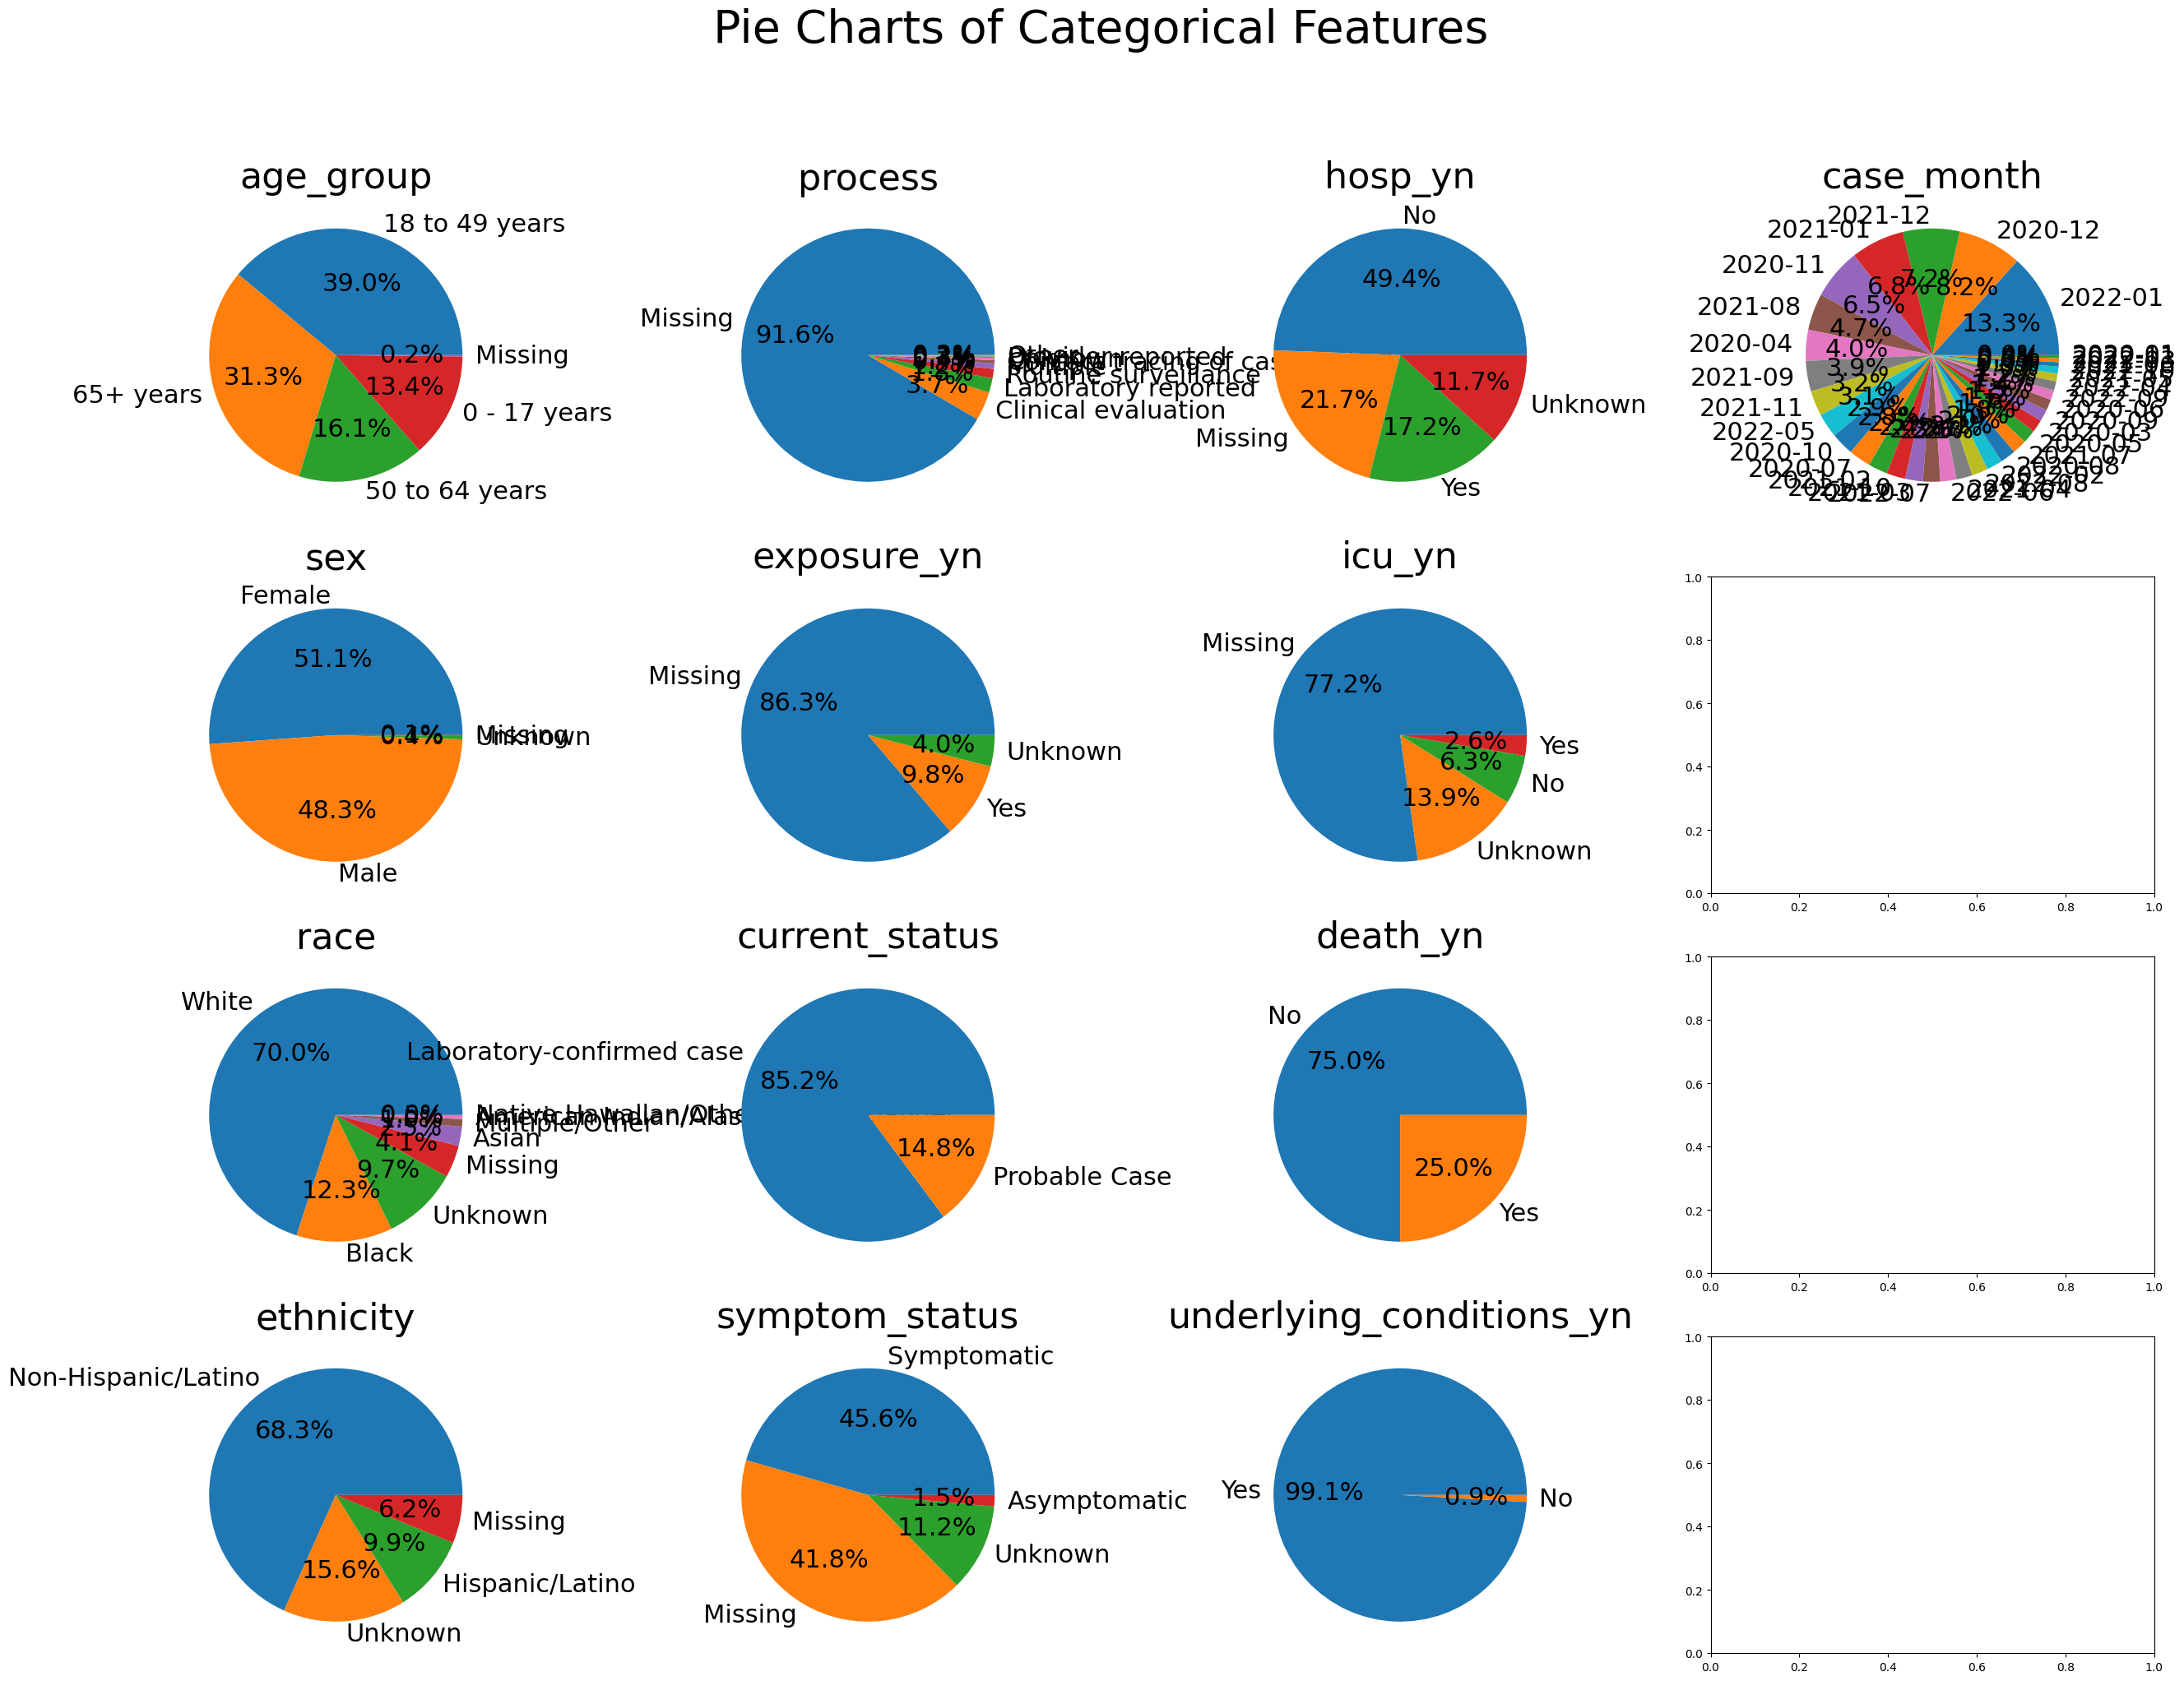

In [21]:
# pie charts of all the categorical features except states and counties as they make no sense in a pie chart
fig, ax = plt.subplots(4, 4, figsize=(32,23))
fig.suptitle('Pie Charts of Categorical Features', fontsize=40)
row, col = 0, 0

for column in categorical_columns[5:]:
    labels=df[column].value_counts().index
    ax[row, col].pie(df[column].value_counts(), autopct="%1.1f%%",labels=labels, textprops={'fontsize':22})
    ax[row, col].set_title(column, fontsize= 32)
    ax[row, col].tick_params(axis='both', which='major', labelsize=30)

    row+=1
    if row ==4:
        row = 0
        col += 1
        
column='case_month'
labels=df[column].value_counts().index
ax[row, col].pie(df[column].value_counts(), autopct="%1.1f%%",labels=labels, textprops={'fontsize':22})
ax[row, col].set_title(column, fontsize= 32)
ax[row, col].tick_params(axis='both', which='major', labelsize=30)

with PdfPages("charts/cat_pie_charts.pdf") as pp:
    pp.savefig(fig.get_figure(), dpi=100)
        
plt.show()

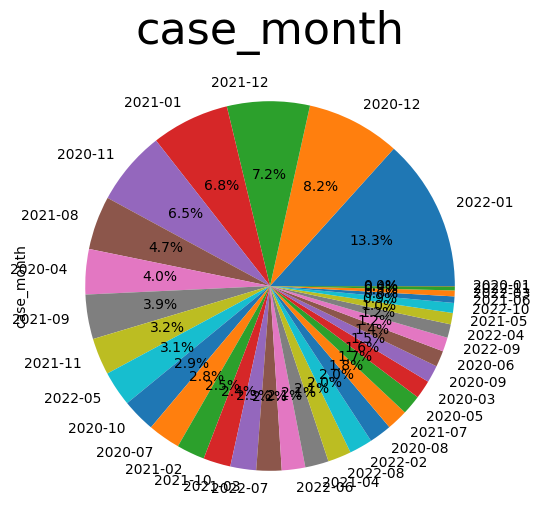

In [22]:
# Look at the values taken by each categorical feature
#exclude state and county values as they are not useful and contain fewer irregular values
column='case_month'
fig = plt.figure(figsize=(10,6))
with PdfPages("charts/cat_pie_chart_large.pdf") as pp:
    f=df[column].value_counts().plot.pie(autopct="%1.1f%%")
    f.set_title(column, fontsize= 32)
    pp.savefig(f.get_figure())
    plt.show()

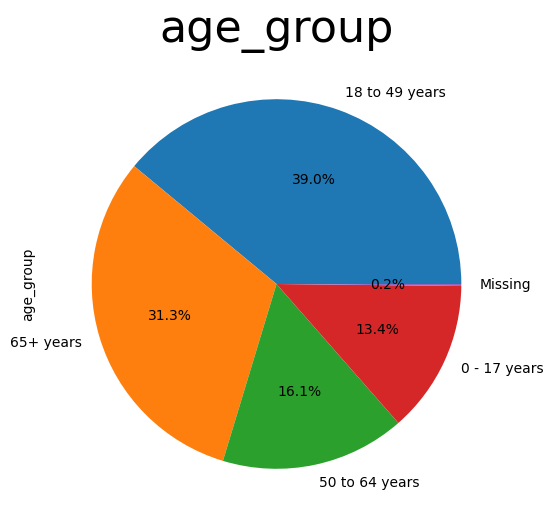

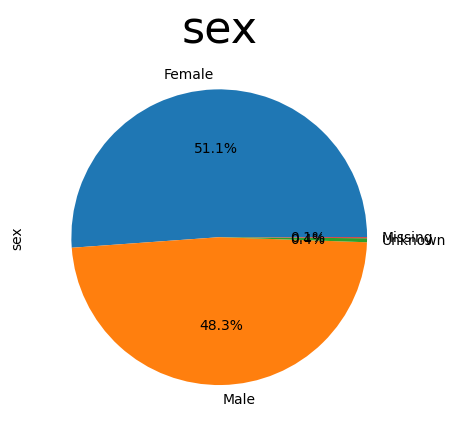

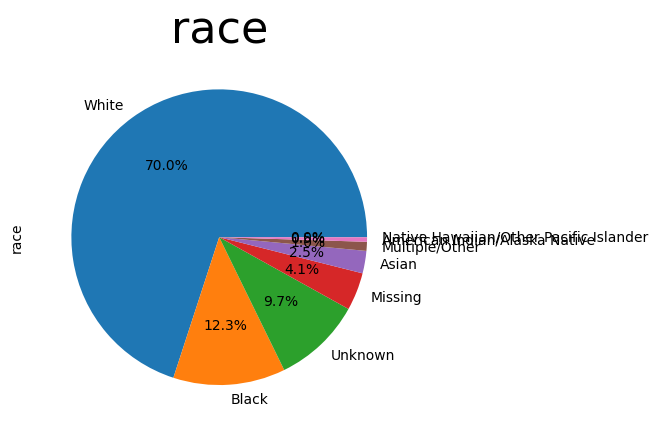

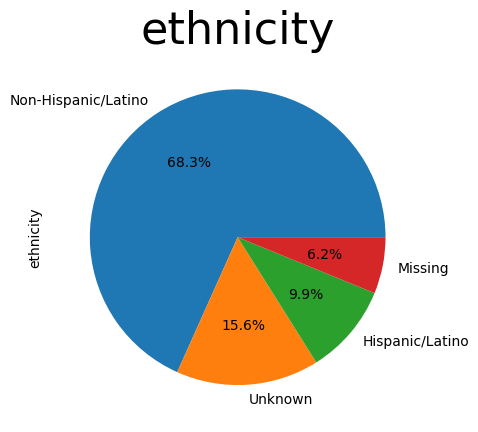

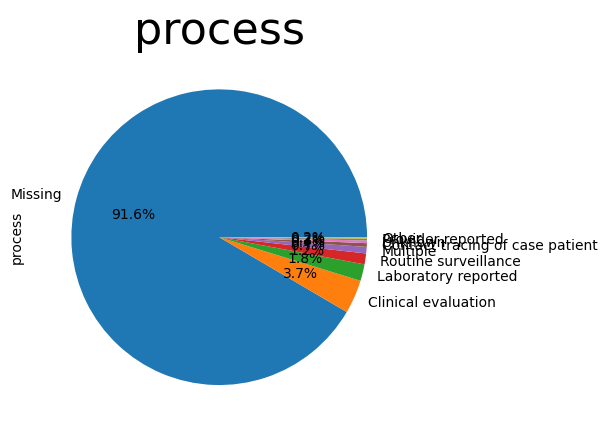

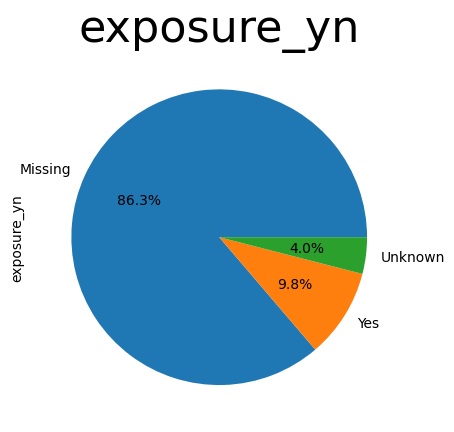

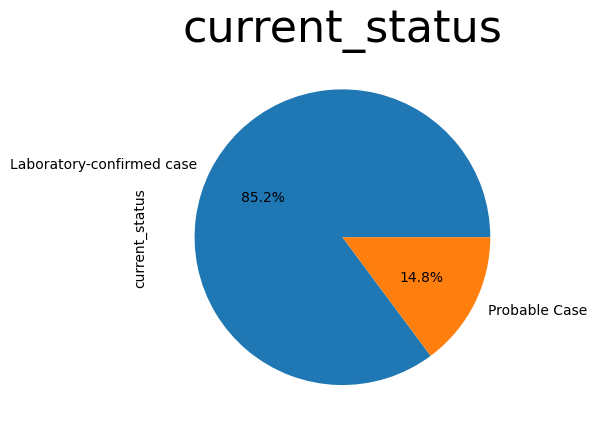

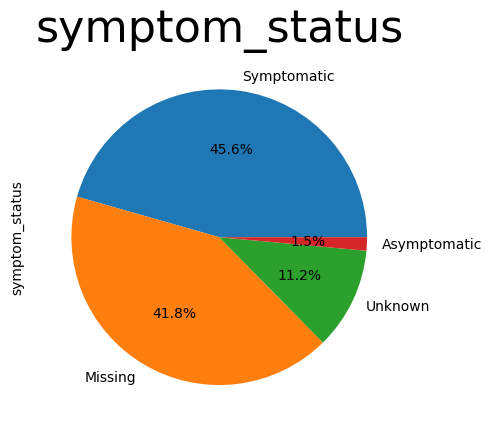

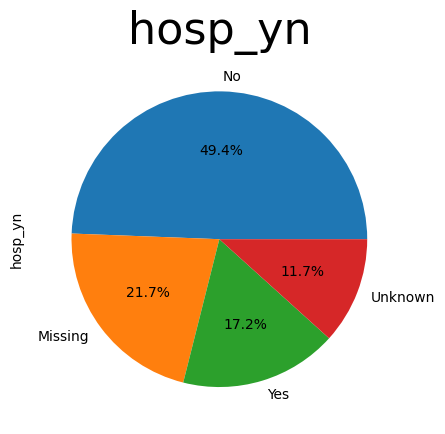

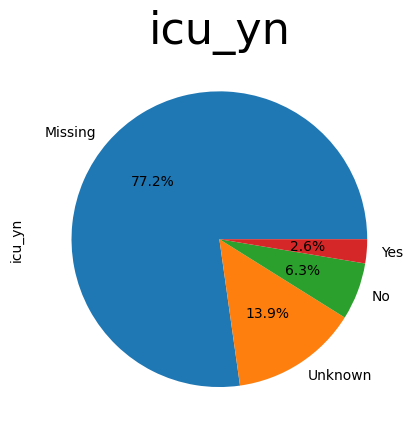

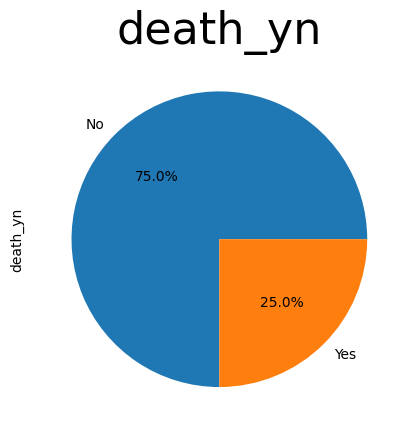

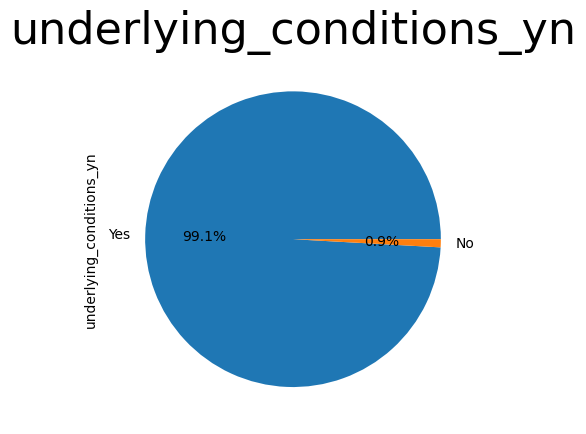

In [23]:
# Look at the values taken by each categorical feature
#exclude state and county values as they are not useful and contain fewer irregular values
col=categorical_columns[5:]
fig = plt.figure(figsize=(10,6))
with PdfPages("charts/cat_pie_chart_large.pdf") as pp:
    for column in col:
        f=df[column].value_counts().plot.pie(autopct="%1.1f%%")
        f.set_title(column, fontsize= 32)
        pp.savefig(f.get_figure())
        plt.show()

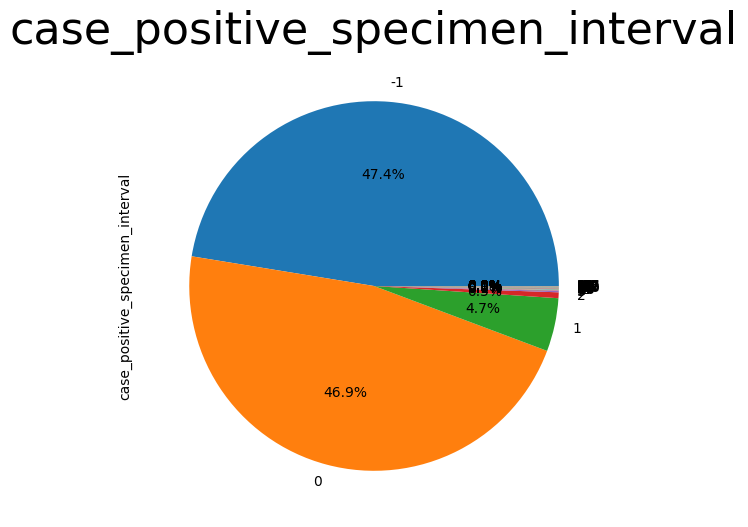

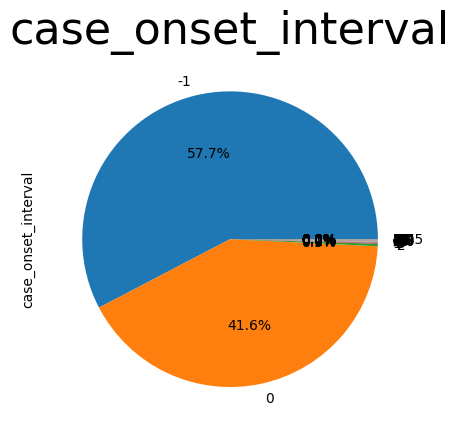

In [24]:
# Look at the values taken by each continuous feature, as a percentage
fig = plt.figure(figsize=(10,6))
with PdfPages("charts/cont_pie_chart_large.pdf") as pp:
    for column in continuous_columns:
        f=df[column].value_counts().plot.pie(autopct="%1.1f%%")
        f.set_title(column, fontsize= 32)
        pp.savefig(f.get_figure())
        plt.show()

### Logical Integrity Checks for Continuous Features

#### Test 1- Check case_positive_specimen_interval for negatives or values that are too large

In [25]:
# Count the number of values that are between 0 and 10, inclusive
count = len(df[(df['case_positive_specimen_interval'] >= 0) & (df['case_positive_specimen_interval']<= 10)])
# Print the number of values that have falied this test
print('The number of rows that failed for case_positive_specimen_interval are:',20000-count)

The number of rows that failed for case_positive_specimen_interval are: 9546


#### Test 2- Check case_onset_interval for negatives or values that are too large

In [26]:
# Count the number of values that are between 0 and 10, inclusive
count = len(df[(df['case_onset_interval'] >= 0) & (df['case_onset_interval']<= 10)])
# Print the number of values that have falied this test
print('The number of rows that failed for case_onset_interval are:',20000-count)


The number of rows that failed for case_onset_interval are: 11653


### Logical Integrity Checks for Categorical Features

#### Test 3- Check that any row that has yes for icu_yn also has yes for hosp_yn

In [27]:
# Count the number of values that are yes for both
count = len(df[(df['icu_yn'] == 'Yes') & (df['hosp_yn'] == 'Yes')])
#Count number of values that are yes for icu_yn only
count2 = len(df[(df['icu_yn'] == 'Yes')])
print(count)
print(count2)
# Print the number of values that have falied this test
print('The number of rows that failed the test to check that every paitent in the ICU was also recorded as being in hospital are:',count2-count)

524
526
The number of rows that failed the test to check that every paitent in the ICU was also recorded as being in hospital are: 2


In [28]:
## Drop the two rows that failed test 3
df.drop(df[(df['icu_yn'] == 'Yes') & (df['hosp_yn'] == 'No')].index, inplace=True)


### Continuous Feature Analysis

#### Table with Descriptive Statistics for Continuous Features


In [81]:
df.replace(-1, np.nan, inplace=True)
df[continuous_columns].describe()

,case_positive_specimen_interval,case_onset_interval
count,10512.000000,8467.000000
mean,0.182268,-0.005433
std,2.355495,1.938694
min,-58.000000,-105.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,80.000000,53.000000


#### Histograms for Continuous Features

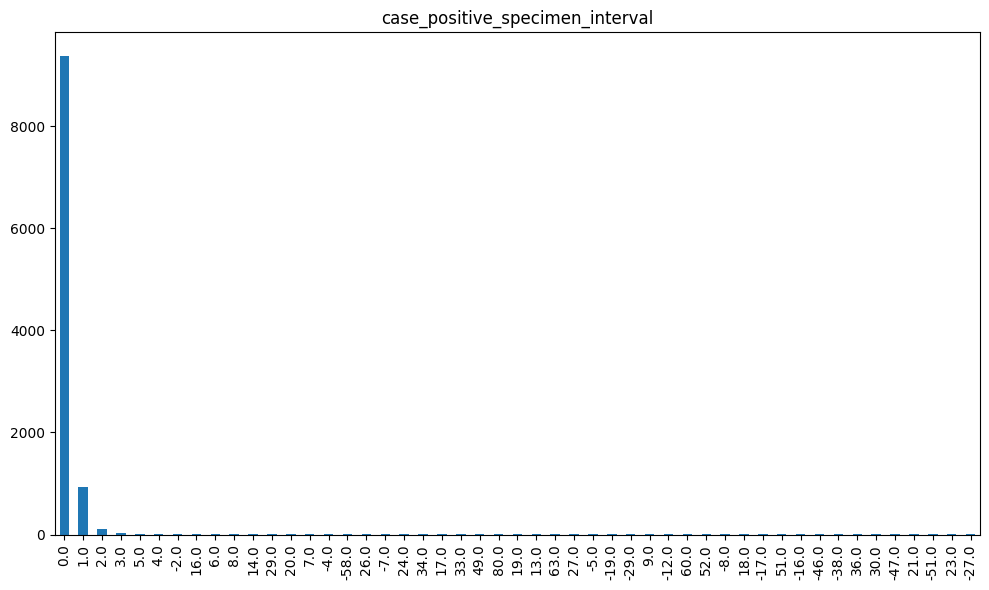

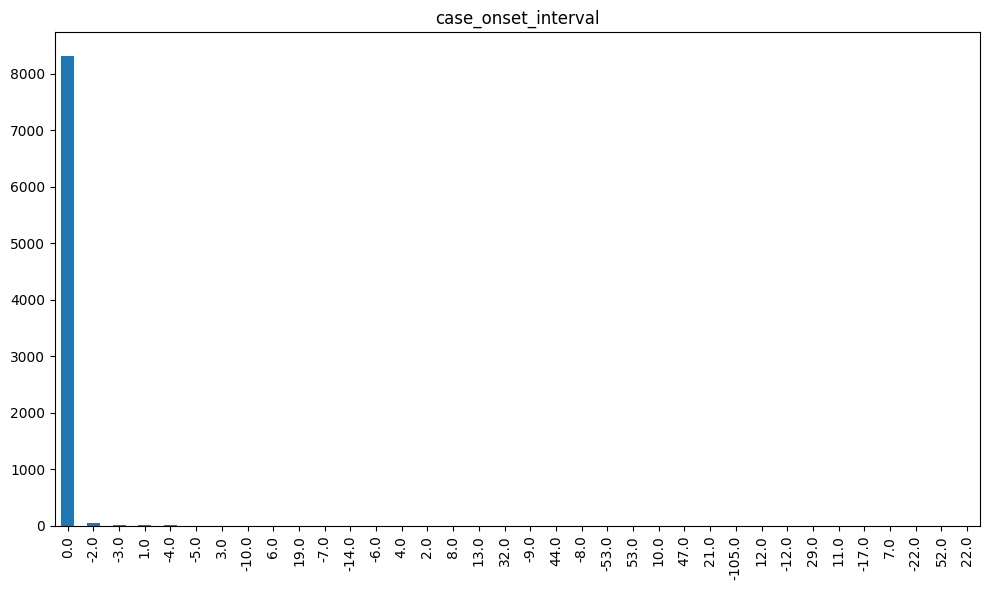

In [30]:

with PdfPages("charts/cont_histograms_large.pdf") as pp:
    for column in continuous_columns:
        plt.rcParams.update({'figure.autolayout': True})
        plt.figure(figsize=(10,6))
        plt.title(column)
        f=df[column].value_counts().plot.bar()
        pp.savefig(f.get_figure())


#### Boxplots for Continuous Features

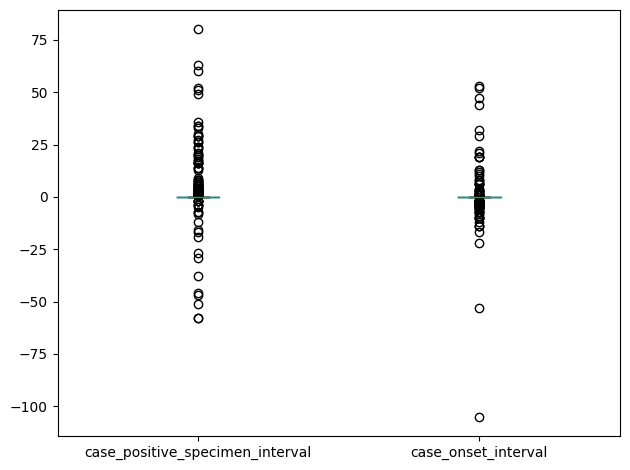

In [31]:
with PdfPages("charts/cont_boxplotp1.pdf") as pp:
    f=df[continuous_columns].boxplot(grid=False, fontsize=10)
    pp.savefig(f.get_figure())


Can clearly see that the majority of the continuous features are centered around 0

### Categorical Feature Analysis

#### Table with Descriptive Statistics for Categorical Features

In [32]:
df[categorical_columns].describe().T


,count,unique,top,freq
case_month,19998,34,2022-01,2665
res_state,19997,48,NY,2144
state_fips_code,19997.0,48.0,36.0,2144.0
res_county,18804,865,MIAMI-DADE,376
county_fips_code,18804.0,1214.0,12086.0,376.0
age_group,19848,5,18 to 49 years,7740
sex,19621,4,Female,10033
race,17701,8,White,12387
ethnicity,17508,4,Non-Hispanic/Latino,11958
process,19998,9,Missing,18310


#### Barplots for Categorical Features

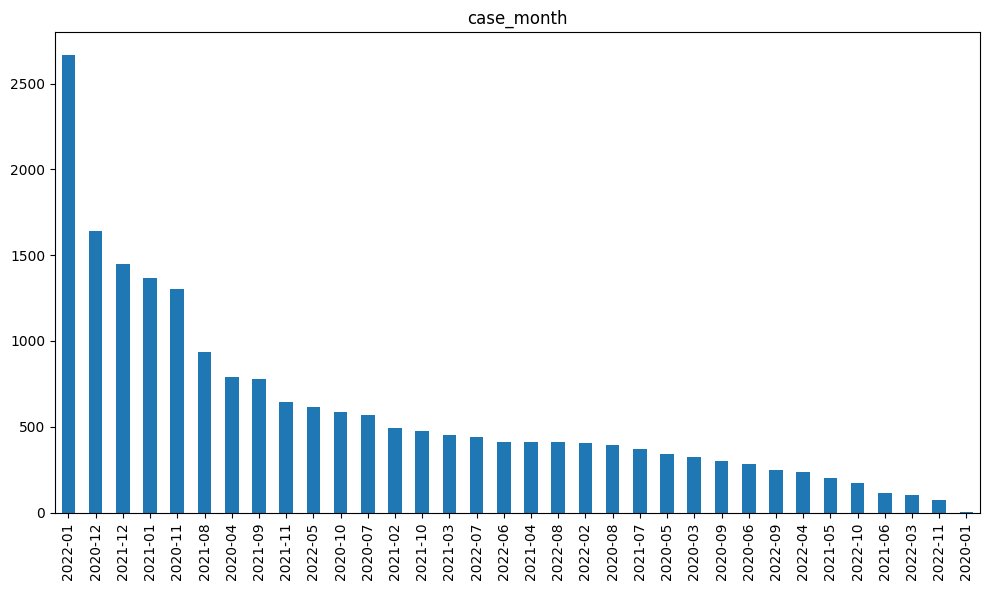

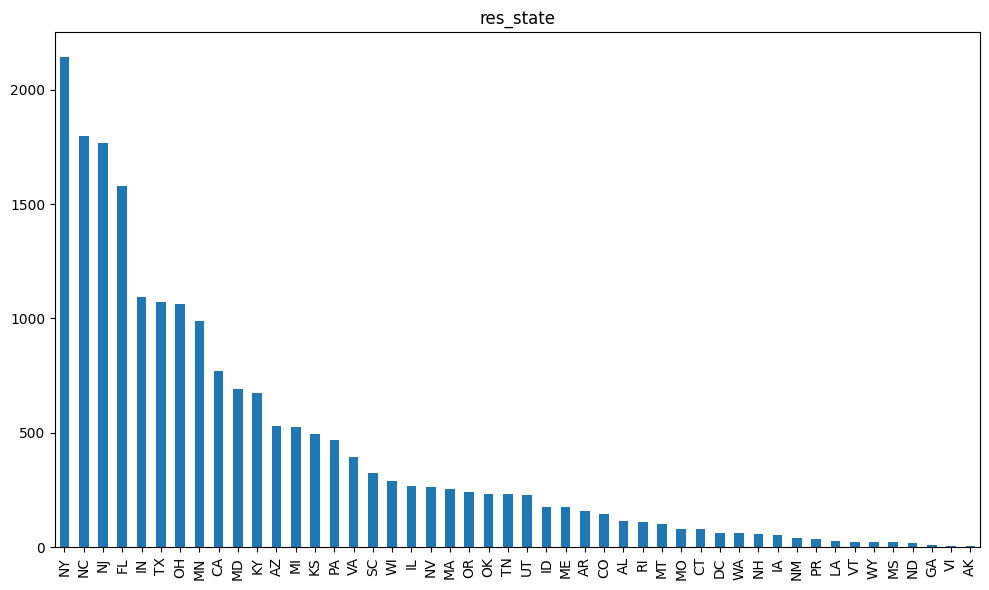

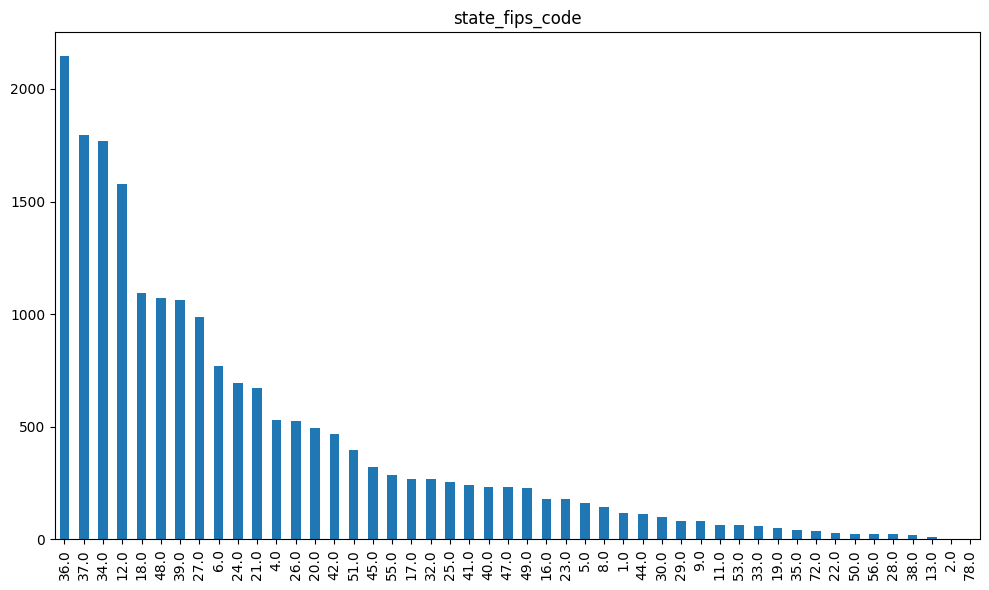

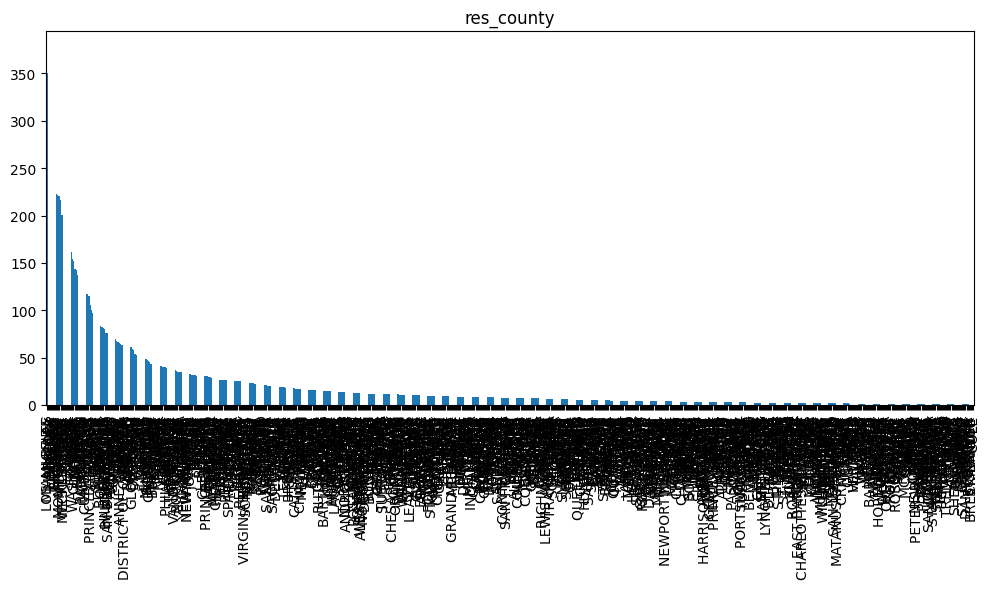

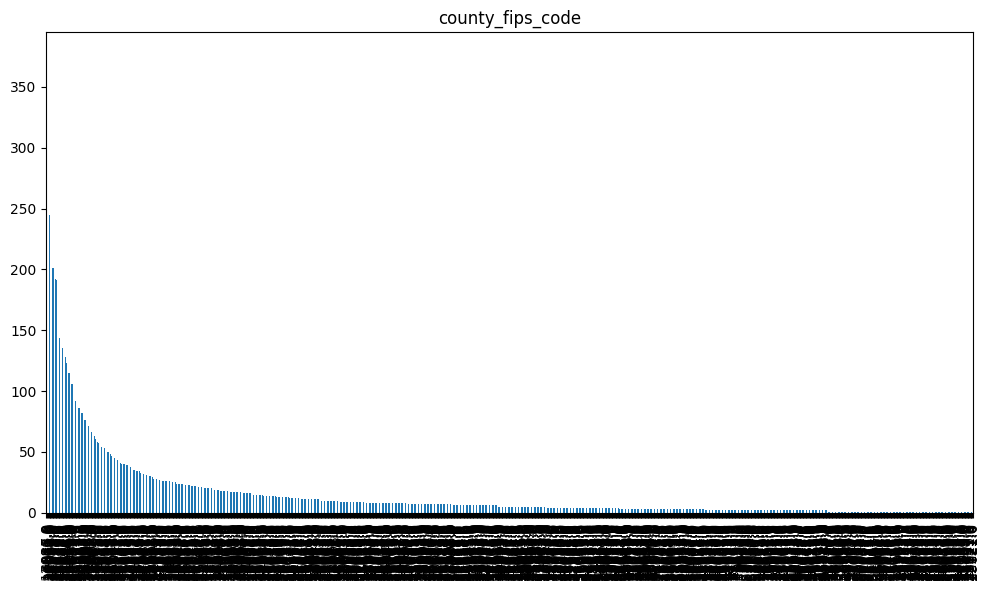

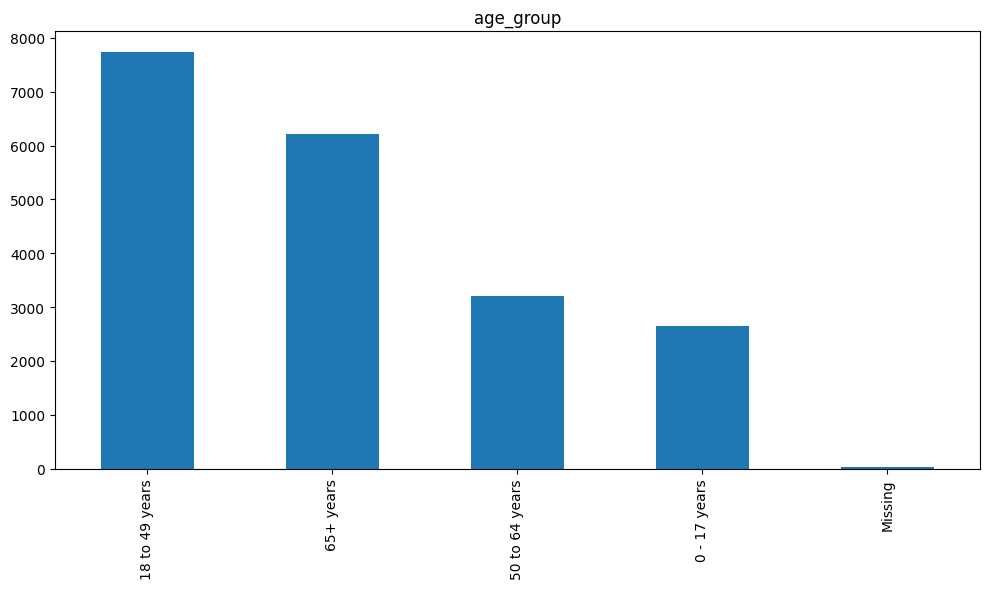

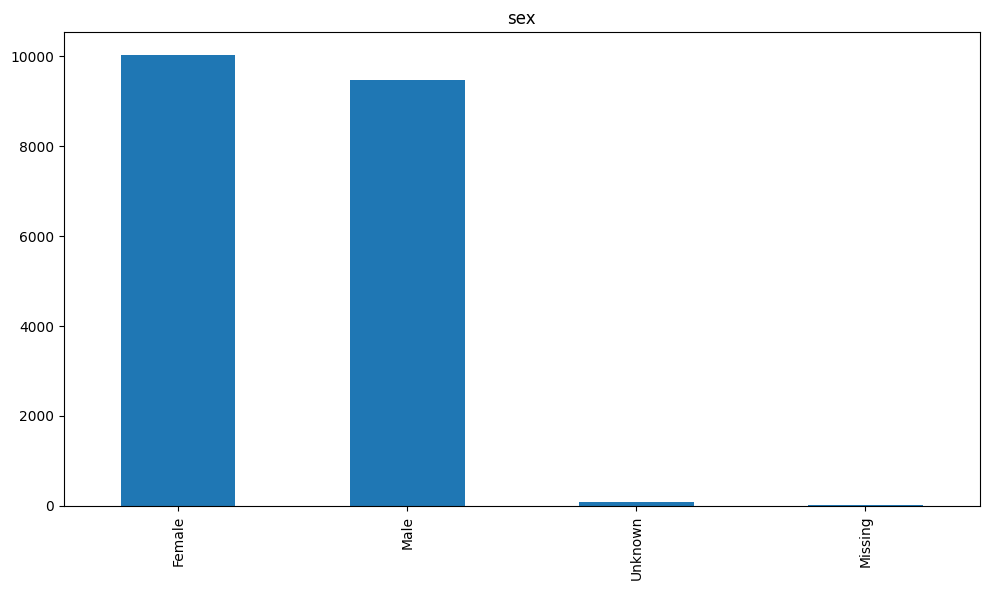

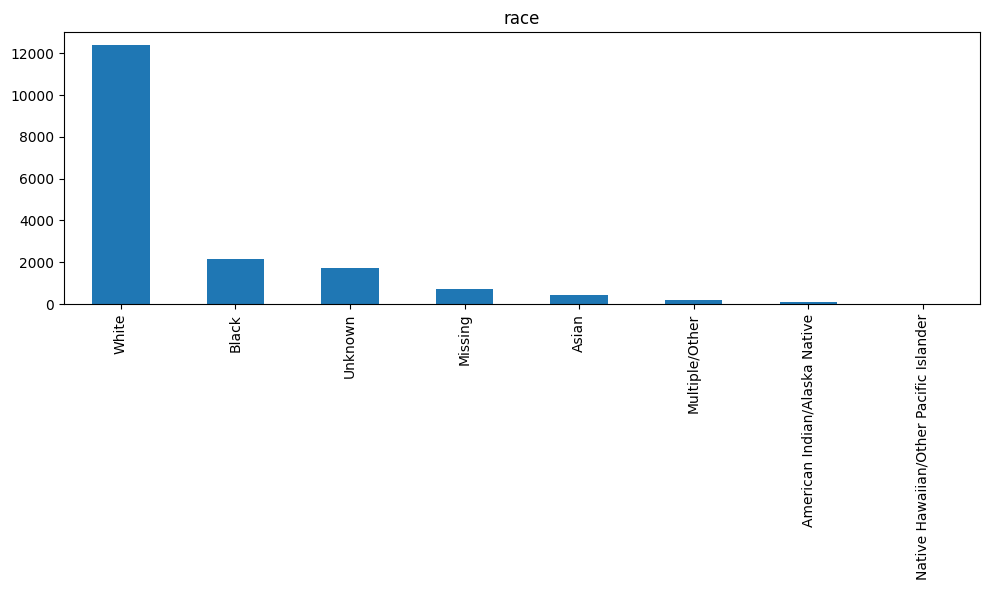

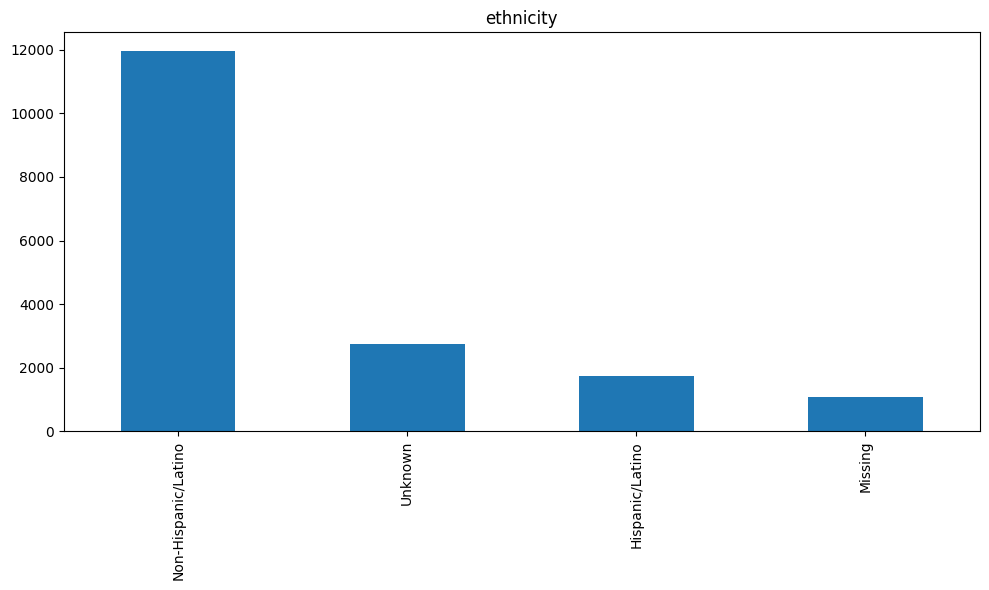

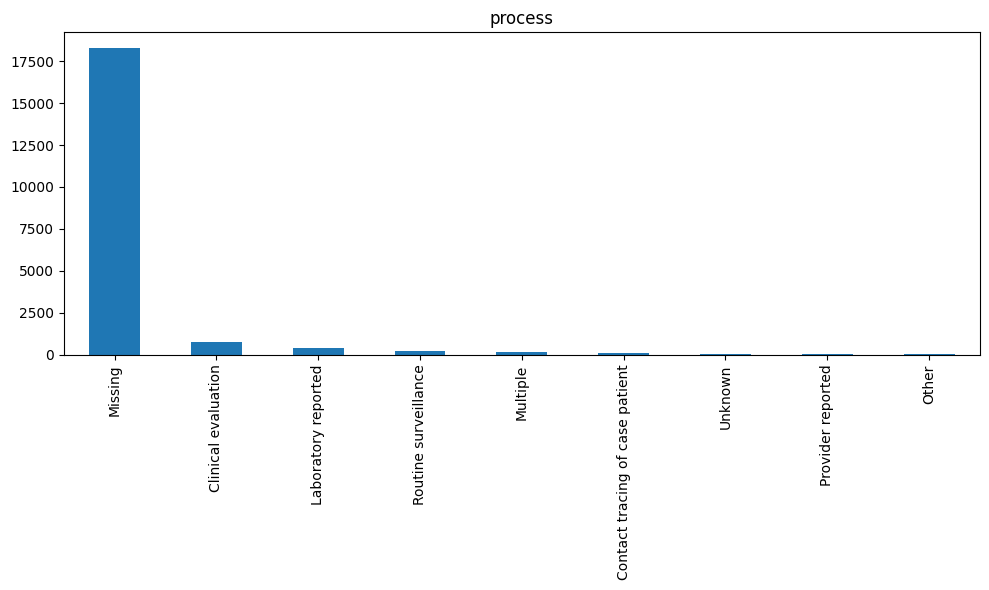

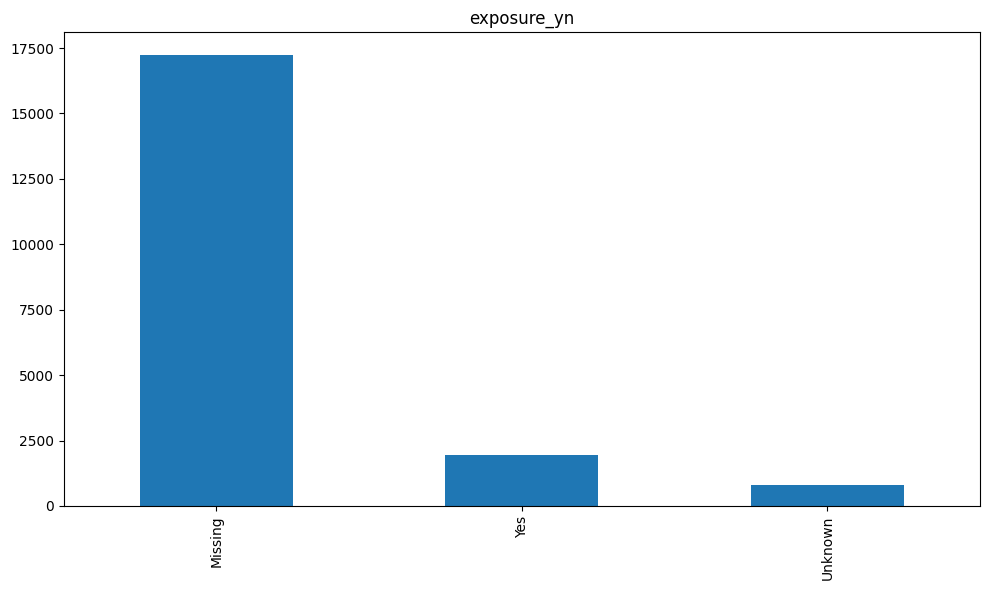

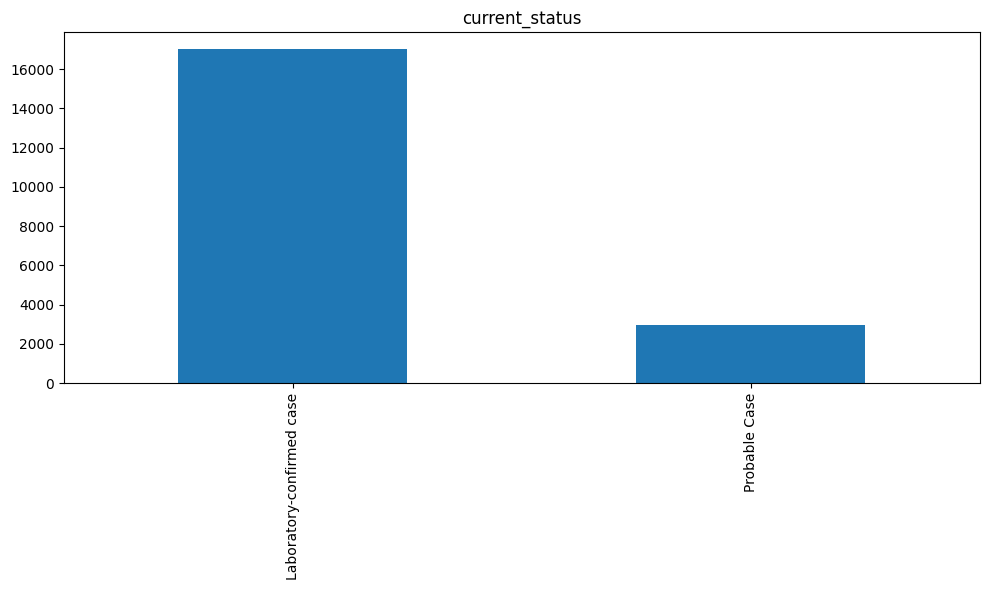

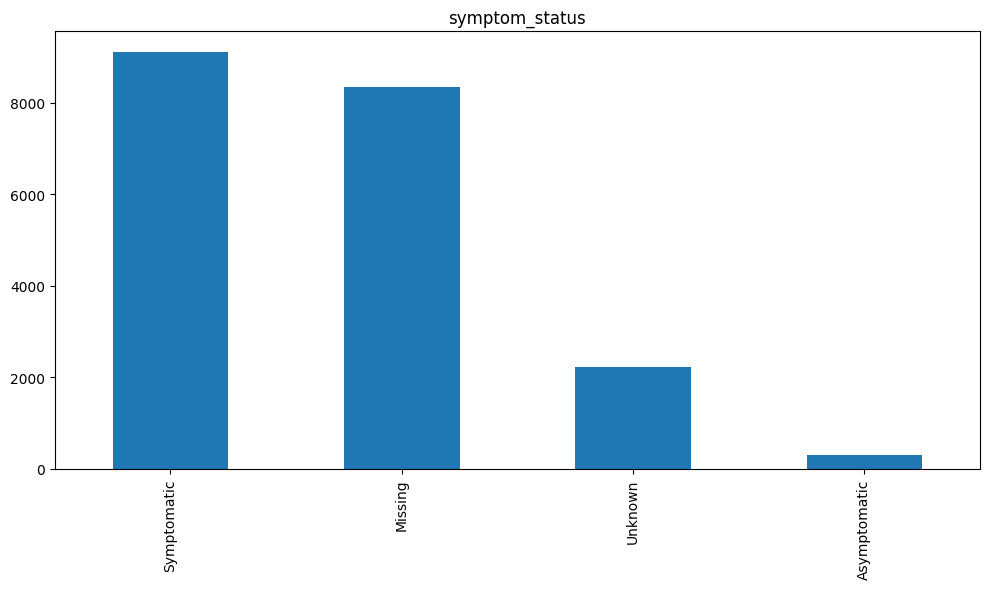

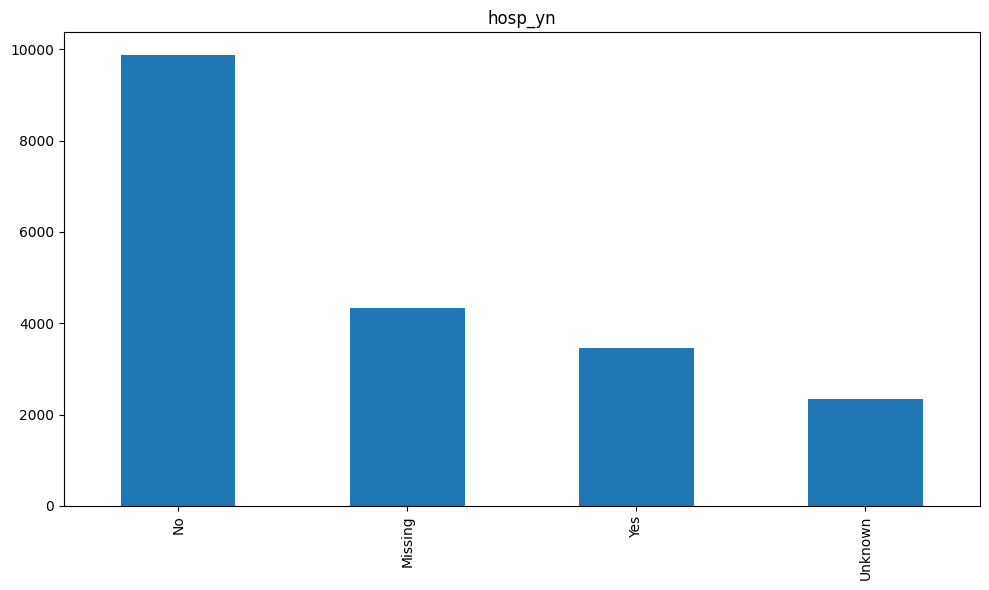

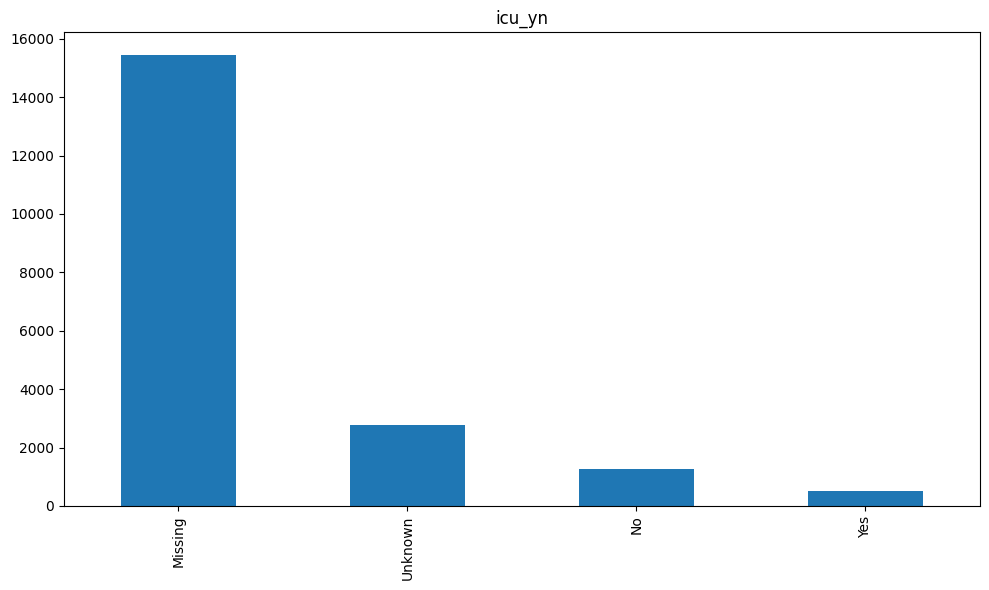

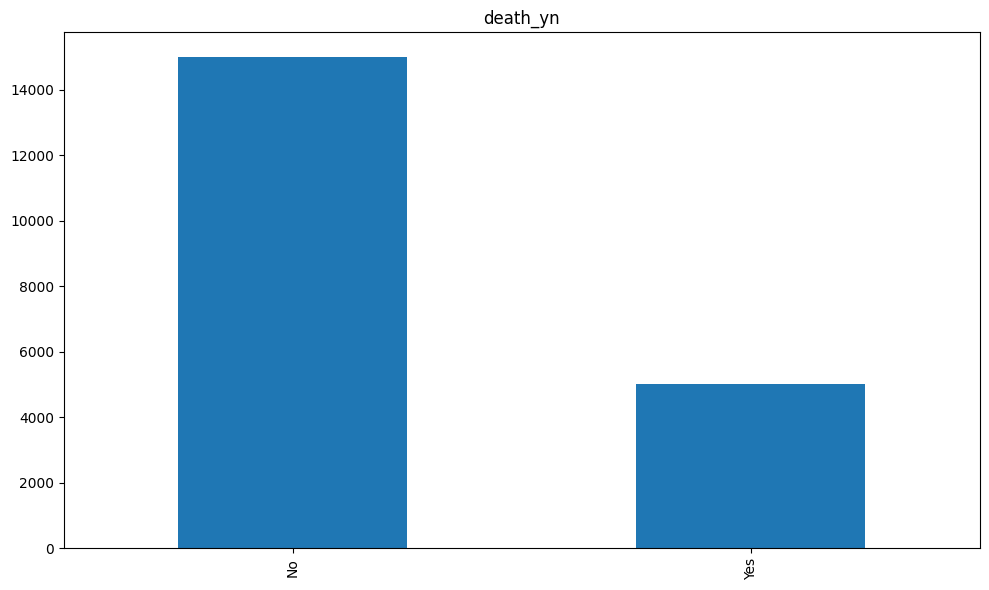

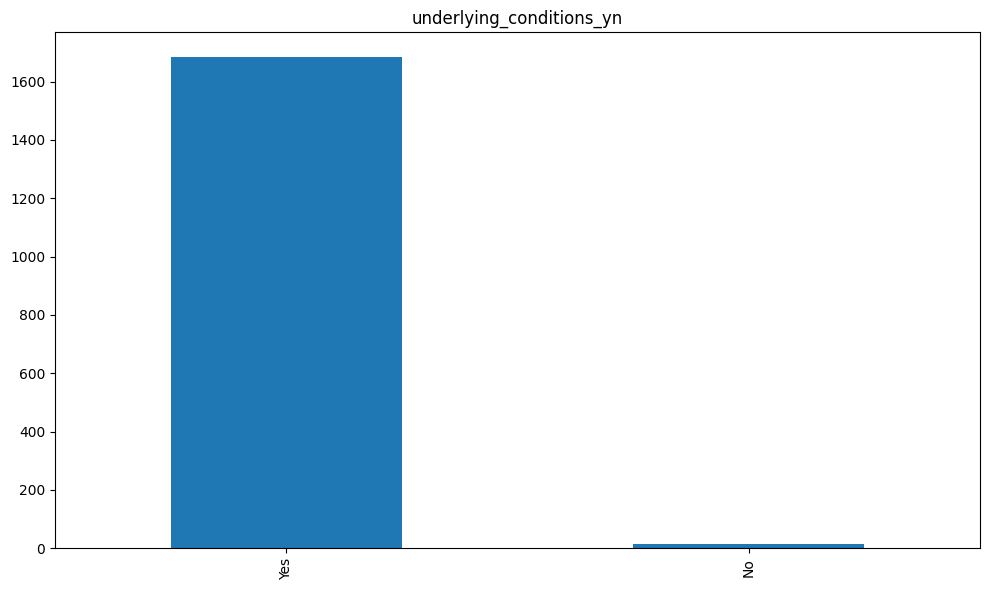

In [33]:

with PdfPages("charts/cat_histograms_large.pdf") as pp:
    for column in categorical_columns:
        plt.rcParams.update({'figure.autolayout': True})
        plt.figure(figsize=(10,6))
        plt.title(column)
        f=df[column].value_counts().plot.bar()
        pp.savefig(f.get_figure())


## Summary of findings

### Continuous Features
- case_positive_specimen_interval:
    - Has lots of 0 and -1 (Missing) values 
- case_onset_interval:
    - Has lots of 0 and -1 (Missing) values 

### Categorical Features
- case_month:
    - Looks like a decreasing exponential distribution of covid cases over the months collected
- res_state/state_fips_code:
    - Looks like a decreasing exponential distribution of covid cases over the different states of the US
- res_county/county_fips_code:
    - Looks like a decreasing exponential distribution of covid cases over the different counties of the US
- age_group:
    - The 18-49 group had the most cases followed by the 65+ group
- sex:
    - Slightly more cases were female than male
- race:
    - White had the most number of cases
- ethnicity:
    - Non Hispanic had the largest number of cases
- process:
    - Had a massive amount of missing data
- exposure_yn:
    - Had a massive amount of missing data
- current_status:
    - Majority were Laboratory Confirmed cases
- symptom_status:
    - Had a massive amount of missing data
- hosp_yn:
    - No was the most common value
- icu_yn:
    - Had a massive amount of missing data
- death_yn:
    - 75% of my sample set did not die of Covid-19, 25% did.
- underlying_conditions_yn:
    - Had a massive amount of missing data

#### Save dataframe to csv file

In [34]:
df.to_csv('part_1_covid19-cdc-19321726.csv', index=False)

## Part 2
### Data Quality Plan for Cleaned CSV file

| Feature                 | Data Quality Issue         | Handling Strategy         |
|-------------------------|----------------------      |------------------------   |  
| case_positive_specimen_interval | Large amount of null values (47%), Failure of Logical integrity checks | Drop column as this feature has little effect on target outcome |
| case_onset_interval | Large amount of null values (57%), Failure of Logical integrity checks | Drop column as this feature has little effect on target outcome |
|case_month	   |  No data quality issues | Keep as is|
|res_state	   |  1 null value |  Drop row as it is only 1 row|
state_fips_code  |  	1 null value  | Drop feature as it is like a duplicate column to res_state
res_county	  |   6% null values | Convert null to missing, and take missing values into account when analysing data
county_fips_code	| 6% null values | Drop feature as its like a duplicate column to res_county
age_group	 |    0.9% missing/unknown values | Convert unknown to missing, and take missing values into account when analysing data
sex	| 2.4% null/missing/unknown values|  Convert unknown/null to missing, and take missing values into account when analysing data
race  |  24% null/missing/unknown values | Convert unknown/null to missing, and take missing values into account when analysing data
ethnicity	| 31.5% null/missing/unknown values  |Convert unknown/null to missing, and take missing values into account when analysing data
process	| 92% missing/unknown values | Drop column as this feature has little effect on target outcome
exposure_yn	 |90% missing/unknown values | Drop column as this feature has little effect on target outcome
current_status	| No data quality issues | Keep as is
symptom_status	 |53% missing/unknown values | Drop column as this feature has little effect on target outcome and is missing >50% of values 
hosp_yn	| 33% missing/unknown values, 2 rows failed Logical Intergrity Check | Convert unknown to missing, and take missing values into account when analysing data
icu_yn	| 91% missing/unknown values | Convert unknown/null to missing, and take missing values into account when analysing data
death_yn	| No data quality issues | Keep as is
underlying_conditions_yn	| 91% null values | Convert null to missing, and take missing values into account when analysing data



In [35]:
#Read from csv file into dataframe
df2 = pd.read_csv('cleaned_1_covid19-cdc-19321726.csv', keep_default_na=True, delimiter=',', skipinitialspace=True)
#check the number of rows and columns in this data set
df2.shape

(19998, 19)

### Explanation of Handling Strategy: 
- case_positive_specimen_interval: Drop column. I decided to drop this feature because it has a large amount of missing values (47%) and it also failed the logical integrity checks. This feature is not useful for the prediction of death risk. Another solution may have been to keep this feature and impute the values.

- case_onset_interval: Drop column. I decided to drop this feature because it has a large amount of missing values (57%) and it also failed the logical integrity checks. This feature is not useful for the prediction of death risk. Another solution may have been to keep this feature and impute the values.

- case_month: Keep as is

- res_state: Drop row as it is only 1 row. This is better than imputation as imputation here is unlikely to be accurate. Another solution may have been to keep this row and leave it as 'Missing'.

- state_fips_code: Drop feature as it is like a duplicate column of res_state

- res_county: Convert null to missing, and take missing values into account when analysing data. I chose to do this because it is only 6% of the data and imputation is unlikely to be accurate. 

- county_fips_code: Drop feature as it is like a duplicate column of res_county

- age_ group: Convert unknown to missing, and take missing values into account when analysing data. I chose  to do this as I don't want to drop rows unless absolutely necessary. I also don't want to impute values as this is unlikely to be accurate.

- sex: Convert unknown/null to missing, and take missing values into account when analysing data. Same reason as for age_group.

- race: Convert unknown/null to missing, and take missing values into account when analysing data. Same reason as for age_group.

- ethnicity: Convert unknown/null to missing, and take missing values into account when analysing data. Same reason as for age_group.

- process: Drop column as this feature has little effect on target outcome and is missing >50% of values

- exposure_yn: Drop column as this feature has little effect on target outcome and is missing >50% of values.

- current_status: Keep as is

- symptom_status: Drop column as this feature has little effect on target outcome and is missing >50% of values 

- hosp_yn: Convert unknown to missing, and take missing values into account when analysing data. Keeping as it will probably be useful for the prediction of death risk.

- icu_yn: Convert unknown/null to missing, and take missing values into account when analysing data.  Keeping as it will probably be useful for the prediction of death risk.

- death_yn: Keep as is

- underlying_conditions_yn: Convert null to missing, and take missing values into account when analysing data.  Keeping as it will probably be useful for the prediction of death risk.

### Apply Handling Strategy to Cleaned CSV file

Dataframes named as follows:

- df2 = cleaned dataframe
- df_clean =cleaned dataframe with dropped columns etc

### Dropping features:

In [36]:
## Drop the columns (axis=1 means drop columns)
df_clean = df2.drop(['case_positive_specimen_interval','case_onset_interval','process','exposure_yn','symptom_status', "state_fips_code", "county_fips_code"], axis=1)

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19998 entries, 0 to 19997
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   case_month                19998 non-null  object
 1   res_state                 19997 non-null  object
 2   res_county                18804 non-null  object
 3   age_group                 19848 non-null  object
 4   sex                       19621 non-null  object
 5   race                      17701 non-null  object
 6   ethnicity                 17508 non-null  object
 7   current_status            19998 non-null  object
 8   hosp_yn                   19998 non-null  object
 9   icu_yn                    19998 non-null  object
 10  death_yn                  19998 non-null  object
 11  underlying_conditions_yn  1700 non-null   object
dtypes: object(12)
memory usage: 1.8+ MB


### Dropping the row that doesn't have a value for res_state

In [37]:
###Check res_state column for null value
null_rows = df_clean[df_clean['res_state'].isnull()]

# Print the resulting dataframe
print(null_rows)

#drop this null row
df_clean.drop(df_clean[df_clean['res_state'].isnull()].index, inplace=True)

      case_month res_state res_county       age_group     sex race ethnicity  \
12280    2021-08       NaN        NaN  18 to 49 years  Female  NaN       NaN   

                  current_status hosp_yn   icu_yn death_yn  \
12280  Laboratory-confirmed case      No  Missing       No   

      underlying_conditions_yn  
12280                      NaN  


### Replacing null/unknown values with 'Missing'

In [38]:
df_clean = df_clean.fillna('Missing')
df_clean = df_clean.replace('Unknown', 'Missing')

df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19997 entries, 0 to 19997
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   case_month                19997 non-null  object
 1   res_state                 19997 non-null  object
 2   res_county                19997 non-null  object
 3   age_group                 19997 non-null  object
 4   sex                       19997 non-null  object
 5   race                      19997 non-null  object
 6   ethnicity                 19997 non-null  object
 7   current_status            19997 non-null  object
 8   hosp_yn                   19997 non-null  object
 9   icu_yn                    19997 non-null  object
 10  death_yn                  19997 non-null  object
 11  underlying_conditions_yn  19997 non-null  object
dtypes: object(12)
memory usage: 2.0+ MB


### Converting remaining columns to Category type

In [39]:
##convert all remaining categorical columns to category type
df_clean = df_clean.astype('category')
df_clean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 19997 entries, 0 to 19997
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   case_month                19997 non-null  category
 1   res_state                 19997 non-null  category
 2   res_county                19997 non-null  category
 3   age_group                 19997 non-null  category
 4   sex                       19997 non-null  category
 5   race                      19997 non-null  category
 6   ethnicity                 19997 non-null  category
 7   current_status            19997 non-null  category
 8   hosp_yn                   19997 non-null  category
 9   icu_yn                    19997 non-null  category
 10  death_yn                  19997 non-null  category
 11  underlying_conditions_yn  19997 non-null  category
dtypes: category(12)
memory usage: 453.3 KB


In [40]:
#see what the new cleaned data looks like
df_clean.head()

,case_month,res_state,res_county,age_group,sex,race,ethnicity,current_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn
0,2021-01,FL,DUVAL,65+ years,Male,Black,Non-Hispanic/Latino,Laboratory-confirmed case,Yes,Missing,Yes,Missing
1,2020-12,ID,ADA,65+ years,Male,White,Non-Hispanic/Latino,Laboratory-confirmed case,Yes,No,Yes,Missing
2,2022-01,NV,CLARK,65+ years,Male,White,Hispanic/Latino,Laboratory-confirmed case,Yes,Missing,Yes,Yes
3,2020-03,LA,Missing,Missing,Missing,Missing,Missing,Laboratory-confirmed case,Yes,Yes,Yes,Yes
4,2021-01,KS,JOHNSON,65+ years,Male,White,Non-Hispanic/Latino,Probable Case,Missing,Missing,Yes,Missing


### Check number of rows that contain a missing value

In [41]:
# check number of missing values now
for column in df_clean.columns:
    miss_vals =  df_clean.loc[df_clean[column] == "Missing"]
    if miss_vals.empty:##if there are no missing values
        print(column,  "has no values = Missing")
    else:
        print(column,  "- Number of Values = Missing:", len(miss_vals))

case_month has no values = Missing
res_state has no values = Missing
res_county - Number of Values = Missing: 1193
age_group - Number of Values = Missing: 184
sex - Number of Values = Missing: 484
race - Number of Values = Missing: 4743
ethnicity - Number of Values = Missing: 6306
current_status has no values = Missing
hosp_yn - Number of Values = Missing: 6674
icu_yn - Number of Values = Missing: 18221
death_yn has no values = Missing
underlying_conditions_yn - Number of Values = Missing: 18297


### See the size of our dataset if we dropped the rows with missing values

In [42]:
df_drop_all_missing_rows = df_clean[(df_clean != 'Missing')]
df_drop_all_missing_rows=df_drop_all_missing_rows.dropna()
df_drop_all_missing_rows.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 505 entries, 34 to 19997
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   case_month                505 non-null    category
 1   res_state                 505 non-null    category
 2   res_county                505 non-null    category
 3   age_group                 505 non-null    category
 4   sex                       505 non-null    category
 5   race                      505 non-null    category
 6   ethnicity                 505 non-null    category
 7   current_status            505 non-null    category
 8   hosp_yn                   505 non-null    category
 9   icu_yn                    505 non-null    category
 10  death_yn                  505 non-null    category
 11  underlying_conditions_yn  505 non-null    category
dtypes: category(12)
memory usage: 53.6 KB


- As you can see this leaves us with 505 rows left in the dataset. This is not desireable as we would have very little data left.

#### Don't drop rows that contain 'missing' for underlying_conditions_yn and icu_yn as they are missing 91% of values

In [43]:
df_inter=df_clean.drop(columns=['icu_yn','underlying_conditions_yn'])

df_drop_rows_except_icu_under_cond = df_inter[(df_inter != 'Missing')]
df_drop_rows_except_icu_under_cond =df_drop_rows_except_icu_under_cond .dropna()

df_drop_rows_except_icu_under_cond.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9027 entries, 0 to 19997
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   case_month      9027 non-null   category
 1   res_state       9027 non-null   category
 2   res_county      9027 non-null   category
 3   age_group       9027 non-null   category
 4   sex             9027 non-null   category
 5   race            9027 non-null   category
 6   ethnicity       9027 non-null   category
 7   current_status  9027 non-null   category
 8   hosp_yn         9027 non-null   category
 9   death_yn        9027 non-null   category
dtypes: category(10)
memory usage: 210.5 KB


- This leaves us with 9027 rows left that have a missing value only for icu_yn and underlying_condition_yn.

- This is interesting to consider using this dataset.

- However I will not use it as it has 50% less data than df_clean

In [44]:
df_clean.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 19997 entries, 0 to 19997
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   case_month                19997 non-null  category
 1   res_state                 19997 non-null  category
 2   res_county                19997 non-null  category
 3   age_group                 19997 non-null  category
 4   sex                       19997 non-null  category
 5   race                      19997 non-null  category
 6   ethnicity                 19997 non-null  category
 7   current_status            19997 non-null  category
 8   hosp_yn                   19997 non-null  category
 9   icu_yn                    19997 non-null  category
 10  death_yn                  19997 non-null  category
 11  underlying_conditions_yn  19997 non-null  category
dtypes: category(12)
memory usage: 453.3 KB


- This is the dataset that I will now encode

### Encode data to allow exploration of relationships between feature pairs in Part3 and save to CSV

- I chose to use dummy/binary encoding for all features

In [45]:

#save the cleaned data to csv
df_clean.to_csv('cleaned_covid19-cdc-19321726.csv', index=False)
#Encode the cleaned data
#state and county increase the size of this matrix substantially
df_clean_encoded=pd.get_dummies(df_clean)
df_clean_encoded.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 19997 entries, 0 to 19997
Columns: 979 entries, case_month_2020-01 to underlying_conditions_yn_Yes
dtypes: uint8(979)
memory usage: 18.8 MB


## Part 3
### Exploring Relationships between Feature Pairs

- The categorical features were encoded using dummy encoding. This will allow for the calculation of statistical coefficients.
- The purpose of this it to allow me to explore the relationships between feature pairs and to see which features are most important in predicting the target outcome.

### Below I will begin to explore the relationships between feature pairs with tools such as .corr() and cramers_corrected_stat()

#### Defining Cramers V function as it is useful for categorical-categorical relationships

In [46]:
def cramers_corrected_stat(confusion_matrix):
    """Calculate Cramer's V statistic for categorical-categorical association.
    Uses correction from Bergsma and Wicher.
    Journal of the Korean Statistical Society 42 (2013): 323-328
    
    Parameters:
    confusion_matrix (array-like): a contingency table
    
    Returns:
    float: Cramer's V statistic
    
    """
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

In [47]:
# Calculate Cramers V Coefficient for the cleaned dataframe
cramers_dict = {}
for col in df_clean:
    confusion_matrix = pd.crosstab(df_clean["death_yn"], df_clean[col])
    cramers_dict[col] = cramers_corrected_stat(confusion_matrix)

cramers_series = pd.DataFrame.from_dict(cramers_dict, orient='index')
cramers_series = cramers_series.sort_values(by=[0], ascending=False)
cramers_series.rename(columns={0: 'Cramers V Coefficient'},inplace=True, errors='raise')


In [48]:
cramers_series.head(12)

,Cramers V Coefficient
death_yn,0.999867
age_group,0.724349
hosp_yn,0.645867
res_county,0.576590
res_state,0.565217
case_month,0.382959
icu_yn,0.264480
ethnicity,0.222618
race,0.201386
underlying_conditions_yn,0.142498


### What does this tell me?
- It tells me which features are most correlated with the feature death_yn
- So age_group, hosp_yn, res_county, res_state and case_month all seem to have a strong correlation with the target outcome

### Correlation Matrix

In [49]:
df_clean_encoded_corr=df_clean_encoded.corr()

print("10 Greatest Positive Correlations to Death = Yes" + "\n",df_clean_encoded_corr["death_yn_Yes"].sort_values(ascending=False).head(10))
print('')
print("10 Greatest Negative Correlations to Death = Yes" + "\n",df_clean_encoded_corr["death_yn_Yes"].sort_values(ascending=True).head(10))

10 Greatest Positive Correlations to Death = Yes
 death_yn_Yes                     1.000000
age_group_65+ years              0.715807
hosp_yn_Yes                      0.631344
res_state_CA                     0.346629
icu_yn_Yes                       0.264614
case_month_2020-04               0.247826
res_county_LOS ANGELES           0.231522
res_state_IL                     0.200874
race_White                       0.173738
ethnicity_Non-Hispanic/Latino    0.163622
Name: death_yn_Yes, dtype: float64

10 Greatest Negative Correlations to Death = Yes
 death_yn_No                        -1.000000
age_group_18 to 49 years           -0.437390
hosp_yn_No                         -0.406467
age_group_0 - 17 years             -0.225846
ethnicity_Missing                  -0.220319
race_Missing                       -0.186444
res_state_NC                       -0.156716
icu_yn_Missing                     -0.143318
underlying_conditions_yn_Missing   -0.139970
age_group_50 to 64 years           -0.1

### Conclusions from Correlation Coefficients Analysis:
- Features that have the greatest impact on the target outcome of death_yn are:

    1. age_group:
        - Correlation of: 0.72 for 65+ years category
        - This is the oldest age category and has a high correlation with death_yn_Yes
        - Correlation of: -0.44 for 18 to 49 years category
        - Correlation of: -0.23 for 0 - 17 years
        - High negative correlation with death_yn_Yes
        
    2. hosp_yn:
        - Correlation of: 0.63 for yes values
        - If the person required hospitilization they had a high correlation with death_yn_Yes
        - Correlation of: -0.41 for no values
        - If they didn't require hospitilization they had a high negative correlation with death_yn_Yes
        
    3. res_state/county:
        - Correlation of: 0.35 for CA
        - Correlation of:  0.20 for IL
        - If someone was from these states they had a high correlation with death_yn_Yes
        - Correlation of: -0.16 for NC
        - If someone was from this state they had a high negatvie correlation with death_yn_Yes
    
    4. icu_yn:
        - Correlation of: 0.26 for yes
    
    5. case_month:
        - Correlation of: 0.25 for month 2020-04

- Features that have a neutral correlation:
    - Sex
    - Race
    - Ethnicity
    - Current status
    - Underlying Condition
    
        

### Beginning of Feature Analysis:

In [50]:
#easier to isolate death=yes variable
df_clean_death_Y=df_clean.loc[df_clean['death_yn']== 'Yes']

Creation of funcitons to help with analysis of features wrt target outcome

In [51]:
#function to print more information regarding death_yn= for each feature that is passed into it
def feature_death_comp(feature):
    """
    Function to create plots and also a statistics table for the given feature in comparison with the death feature
    """
    fig = sea.countplot(data=df_clean, x=feature, hue="death_yn")
    fig.set_xticklabels(fig.get_xticklabels(), rotation=90)
    plt.show()
    fig = sea.countplot(data=df_clean_death_Y, x=feature, hue="death_yn") 
    fig.set_xticklabels(fig.get_xticklabels(), rotation=90)
    plt.show()
    # total deaths for each feature
    feature_deaths = df_clean_death_Y[feature].value_counts(normalize=True) * 100

    # totals for each feature
    feature_totals = df_clean[feature].value_counts(normalize=True) * 100
    
    #create the table
    feature_comp = pd.concat([feature_deaths.rename("Deaths by feature"), feature_totals.rename("Total by feature")], axis=1)
    feature_comp["Difference"] = feature_comp["Deaths by feature"] - feature_comp["Total by feature"]
    feature_comp["Abs_Difference"] = abs(feature_comp["Deaths by feature"] - feature_comp["Total by feature"])
    feature_comp["Rel_Difference"] = feature_comp["Deaths by feature"] / feature_comp["Total by feature"]
    return feature_comp.sort_values(by="Abs_Difference", ascending=False)

In [52]:
# this function does the same except it removes the missing features for better analysis
def feature_death_comp_no_miss(feature):
    """
    Function to create plots and also a statistics table for the given feature in comparison with the death feature with Missing values removed
    """
    df_inter=df_clean
    df_inter=df_inter[(df_inter[feature] != 'Missing')]

    df_inter_d=df_clean_death_Y
    df_inter_d=df_inter_d[(df_inter_d[feature] != 'Missing')]

    fig = sea.countplot(data=df_inter, x=feature, hue="death_yn")
    fig.set_xticklabels(fig.get_xticklabels(), rotation=90)
    plt.show()
    fig = sea.countplot(data=df_inter_d, x=feature, hue="death_yn") 
    fig.set_xticklabels(fig.get_xticklabels(), rotation=90)
    plt.show()

    # total deaths for each feature
    feature_deaths = df_inter_d[feature].value_counts(normalize=True) * 100
    # totals for each feature
    feature_totals = df_inter[feature].value_counts(normalize=True) * 100

    #create the table
    feature_comp = pd.concat([feature_deaths.rename("Deaths by feature"), feature_totals.rename("Total by feature")], axis=1)
    feature_comp["Difference"] = feature_comp["Deaths by feature"] - feature_comp["Total by feature"]
    feature_comp["Abs_Difference"] = abs(feature_comp["Deaths by feature"] - feature_comp["Total by feature"])
    feature_comp["Rel_Difference"] = feature_comp["Deaths by feature"] / feature_comp["Total by feature"]
    return feature_comp.sort_values(by="Abs_Difference", ascending=False)

### Investigation of features with Neutral Correlation wrt target outcome

#### 1. Sex


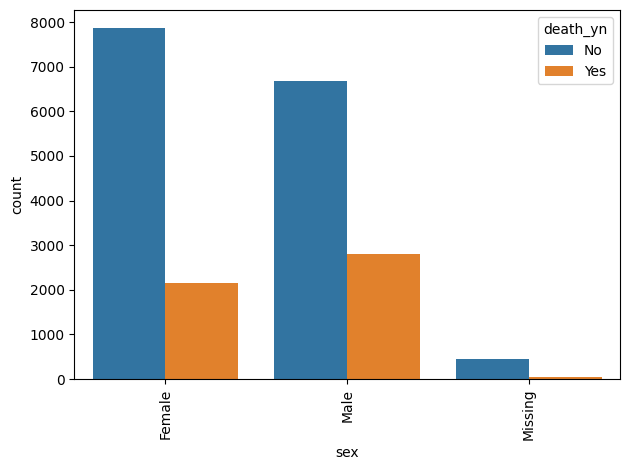

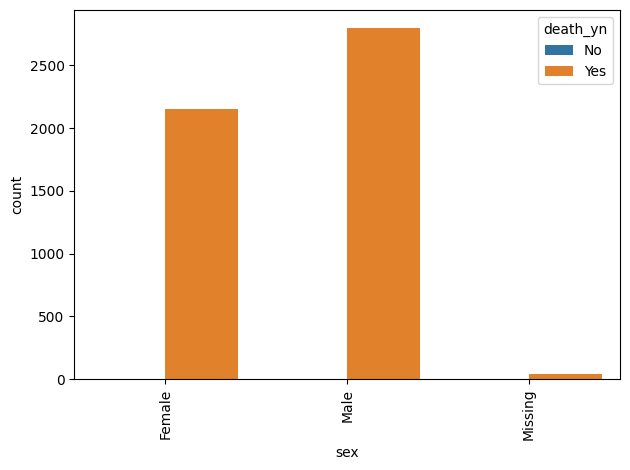

,Deaths by feature,Total by feature,Difference,Abs_Difference,Rel_Difference
Male,56.031206,47.412112,8.619094,8.619094,1.181791
Female,43.108622,50.167525,-7.058903,7.058903,0.859293
Missing,0.860172,2.420363,-1.560191,1.560191,0.355390


In [53]:
feature_death_comp("sex")


- The table above shows the proportion of deaths for this feature, followed by the total occurances for each value of this feature and then subtracts these 2 values to find the difference.
- The 2nd last column is the absolute difference and is used to order the table
- This table tells us that men take up 6% more of the deaths even though there are 2.6% less men in the data set giving a 8.6% difference.
- Females have a difference of -7% for the equivalent calculation.
- The differences between the genders are not great enough to be seen as a death risk predictor
- The small relative difference that is evident between the genders would be most likely due to the biological differences between men and women.

For the above reasons there is very little correlation between sex and death risk from Covid-19. Therefore I will not analyse this feature pair any further.

#### 2. Race
- Because this feature has 32% missing values I will compare the results with and without the missing data

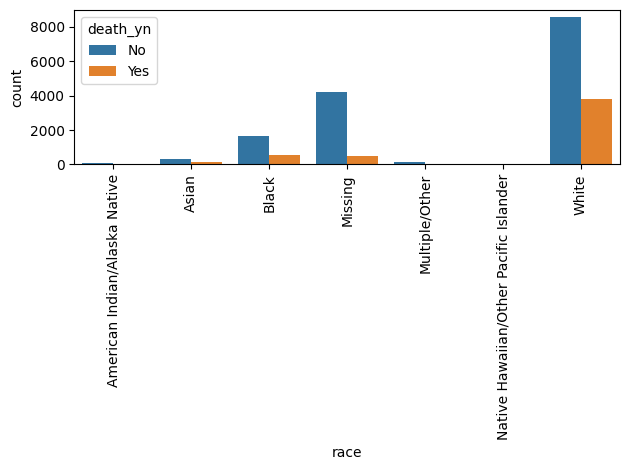

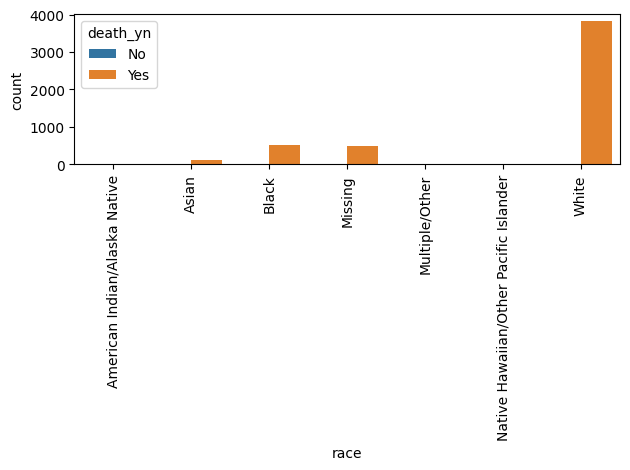

,Deaths by feature,Total by feature,Difference,Abs_Difference,Rel_Difference
White,76.555311,61.944292,14.611019,14.611019,1.235874
Missing,9.981996,23.718558,-13.736561,13.736561,0.420852
Multiple/Other,0.120024,0.870131,-0.750107,0.750107,0.137938
Asian,2.640528,2.170326,0.470203,0.470203,1.216651
Black,10.462092,10.856628,-0.394536,0.394536,0.963659
American Indian/Alaska Native,0.240048,0.435065,-0.195017,0.195017,0.551752
Native Hawaiian/Other Pacific Islander,0.000000,0.005001,-0.005001,0.005001,0.000000


In [54]:
feature_death_comp("race")

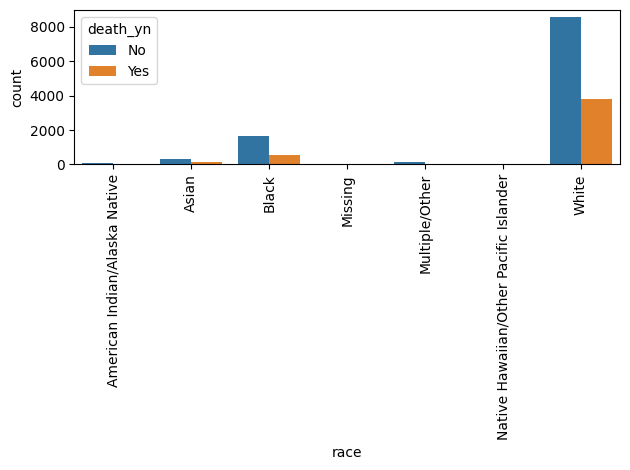

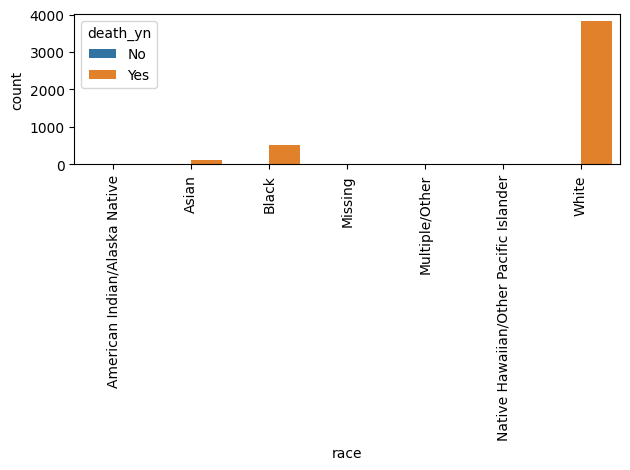

,Deaths by feature,Total by feature,Difference,Abs_Difference,Rel_Difference
White,85.044444,81.204930,3.839515,3.839515,1.047282
Black,11.622222,14.232333,-2.610110,2.610110,0.816607
Multiple/Other,0.133333,1.140684,-1.007351,1.007351,0.116889
American Indian/Alaska Native,0.266667,0.570342,-0.303676,0.303676,0.467556
Asian,2.933333,2.845155,0.088178,0.088178,1.030992
Native Hawaiian/Other Pacific Islander,0.000000,0.006556,-0.006556,0.006556,0.000000
Missing,0.000000,0.000000,0.000000,0.000000,NaN


In [55]:
feature_death_comp_no_miss("race")

- The table without the missing values above shows me that there are no values which have a reasonable difference between the total dataset and the death_yn=Yes

For the above reasons there is very little correlation between race and death risk from Covid-19. Therefore I will not analyse this feature pair any further.

#### 3. Ethnicity

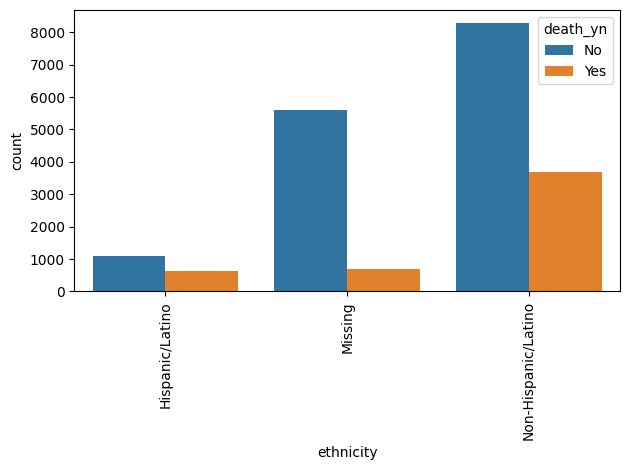

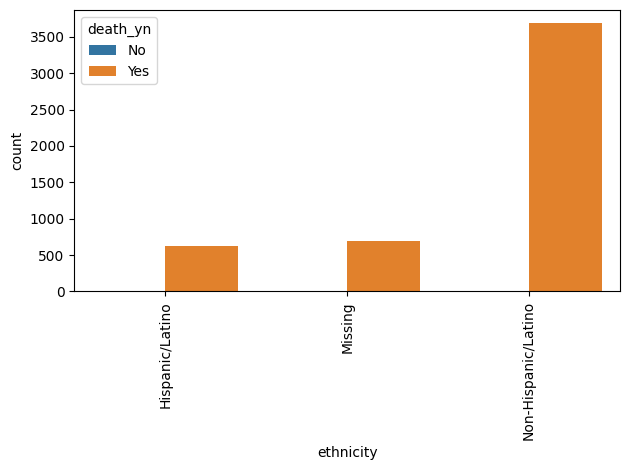

,Deaths by feature,Total by feature,Difference,Abs_Difference,Rel_Difference
Missing,13.802761,31.53473,-17.731970,17.731970,0.437700
Non-Hispanic/Latino,73.694739,59.79897,13.895769,13.895769,1.232375
Hispanic/Latino,12.502501,8.66630,3.836201,3.836201,1.442657


In [56]:
feature_death_comp("ethnicity")

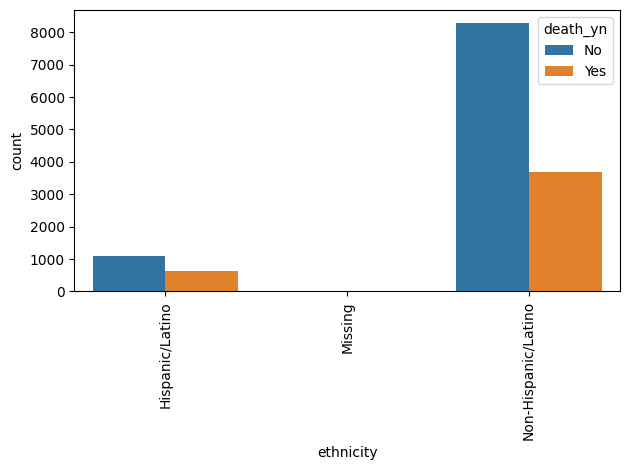

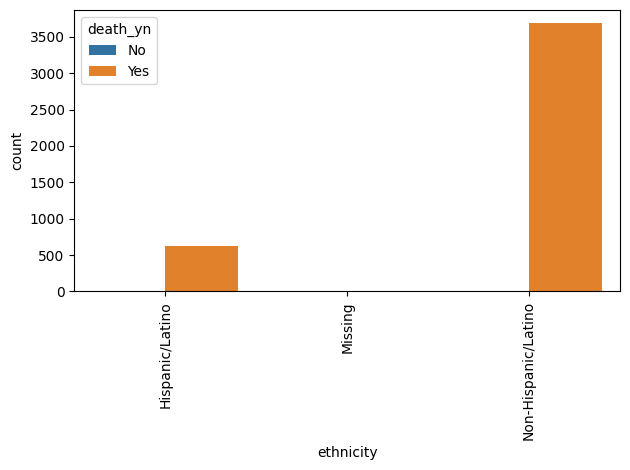

,Deaths by feature,Total by feature,Difference,Abs_Difference,Rel_Difference
Non-Hispanic/Latino,85.495475,87.34205,-1.846575,1.846575,0.978858
Hispanic/Latino,14.504525,12.65795,1.846575,1.846575,1.145883
Missing,0.000000,0.00000,0.000000,0.000000,NaN


In [57]:
feature_death_comp_no_miss("ethnicity")

- The table without the missing values above shows me that there are no values which have a reasonable difference between the total dataset and the death_yn=Yes

For the above reasons there is very little correlation between ethnicity and death risk from Covid-19. Therefore I will not analyse this feature pair any further.

#### 4. Current Status

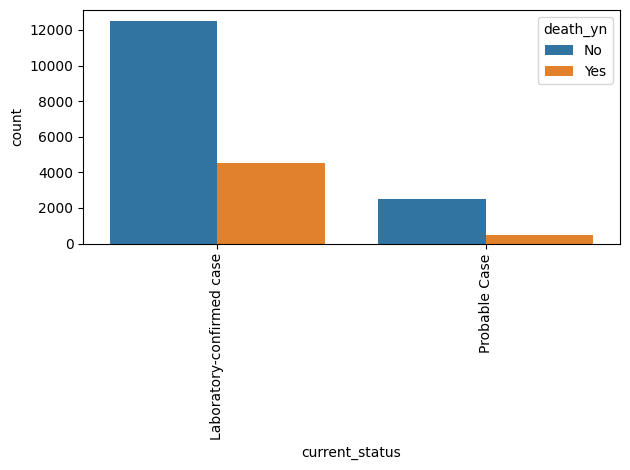

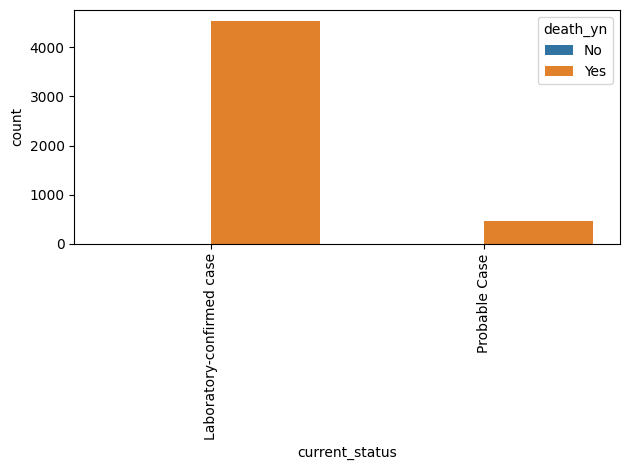

,Deaths by feature,Total by feature,Difference,Abs_Difference,Rel_Difference
Laboratory-confirmed case,90.738148,85.172776,5.565372,5.565372,1.065342
Probable Case,9.261852,14.827224,-5.565372,5.565372,0.624652


In [58]:
feature_death_comp("current_status")

- Results: 
    - These results show a slight decrease in death risk if the case was Probable. A reason for this could be that not all the probable cases actually had Covid-19
    - The difference is not significant enough to point to further investigation.


For the above reasons there is very little correlation between current status and death risk from Covid-19. Therefore I will not analyse this feature pair any further.

#### 5. Underlying Conditions

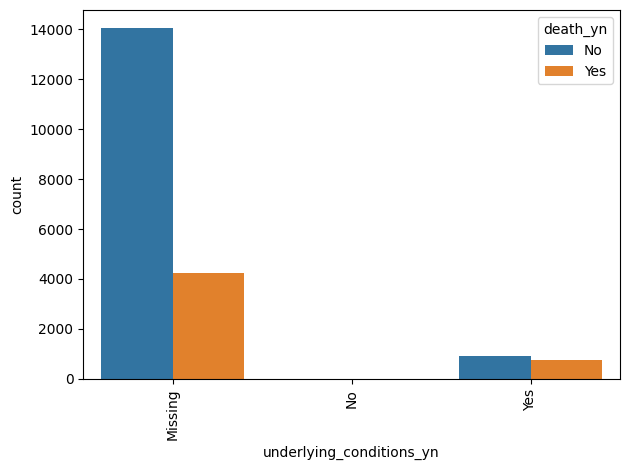

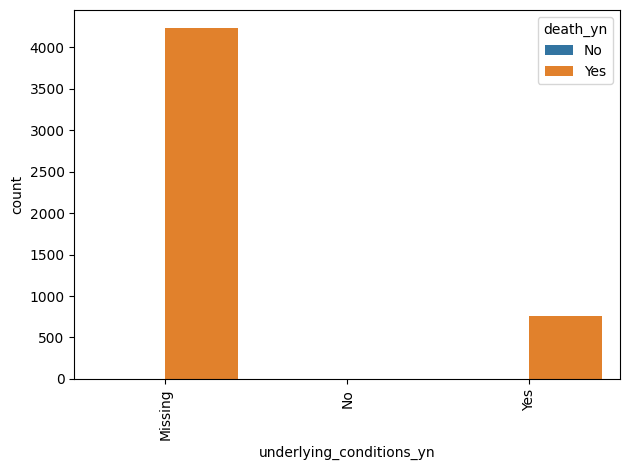

,Deaths by feature,Total by feature,Difference,Abs_Difference,Rel_Difference
Yes,15.263053,8.426264,6.836789,6.836789,1.811367
Missing,84.736947,91.498725,-6.761777,6.761777,0.926100
No,0.000000,0.075011,-0.075011,0.075011,0.000000


In [59]:
feature_death_comp("underlying_conditions_yn")

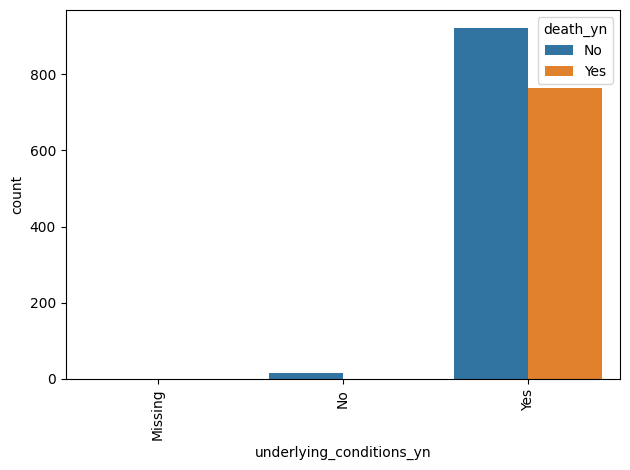

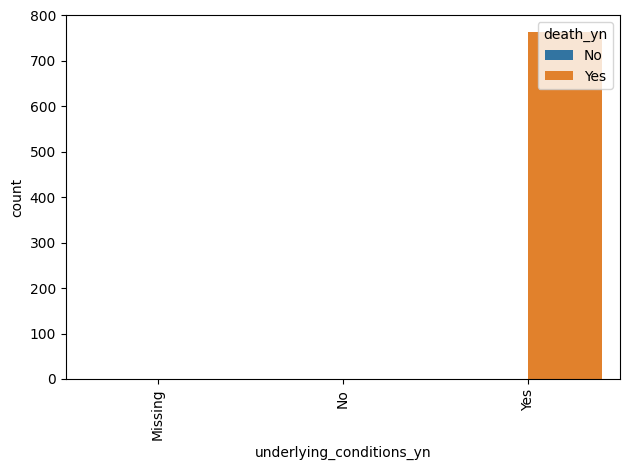

,Deaths by feature,Total by feature,Difference,Abs_Difference,Rel_Difference
No,0.0,0.882353,-0.882353,0.882353,0.000000
Yes,100.0,99.117647,0.882353,0.882353,1.008902
Missing,0.0,0.000000,0.000000,0.000000,NaN


In [60]:
feature_death_comp_no_miss("underlying_conditions_yn")

- Result:
    - Because so much of this data is missing it is very difficult to draw any conclusions about the relationship between underlying conditions and death risk from Covid-19
    - For example there is not a single person who died from Covid-19 in this dataset that is recorded as having no underlying conditions.

For these reasons there is very difficult to be confident in any correlation between underlying conditions and death risk from Covid-19 in this data set. Therefore I will not analyse this feature pair any further.

### Investigation of Features with a Large Correlation wrt target outcome
#### 1. Age Group

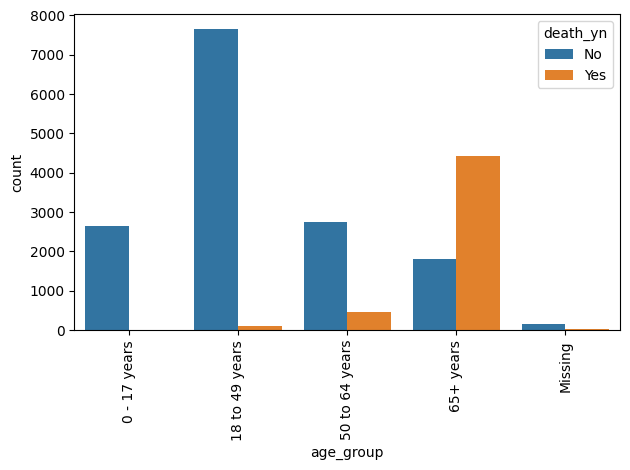

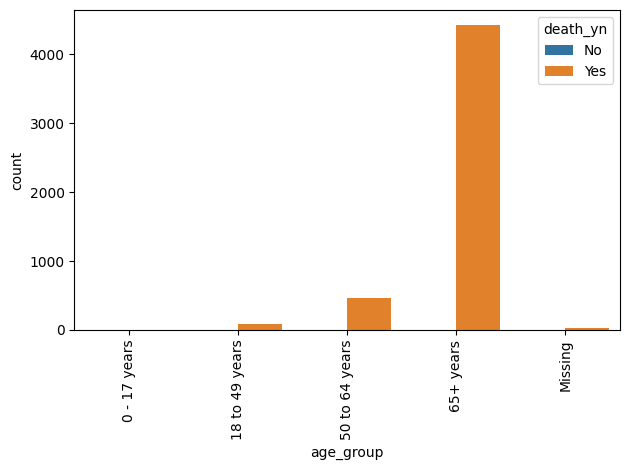

,Deaths by feature,Total by feature,Difference,Abs_Difference,Rel_Difference
65+ years,88.477696,31.089663,57.388032,57.388032,2.845888
18 to 49 years,1.800360,38.700805,-36.900445,36.900445,0.046520
0 - 17 years,0.000000,13.271991,-13.271991,13.271991,0.000000
50 to 64 years,9.261852,16.017403,-6.755550,6.755550,0.578237
Missing,0.460092,0.920138,-0.460046,0.460046,0.500025


In [61]:
feature_death_comp("age_group")

- Results:
    - There is a massive positive correlation for people over 65 and death_yn=Yes of 57%
    - Another category to note is the 18-49 category and the strong negative correltaion this group has with the target outcome. 37%
- For these reasons I will further investigate this feature.

- From the above summary statistics I can conclude that:
    - 88% of deaths were in the 65+ years age group even though they only made up 31% of the total rows
    - 1.8% of deaths were in the 18-49 age category even though they made up 39% of the total number of rows.
    - There were no deaths for the 0-17 age group even though they made up 13% of the total number of rows.
- This tells me that age plays a massive role in death risk from Covid-19. The younger someone is the less likely they are to die from Covid-19

#### 2. Hospitalised

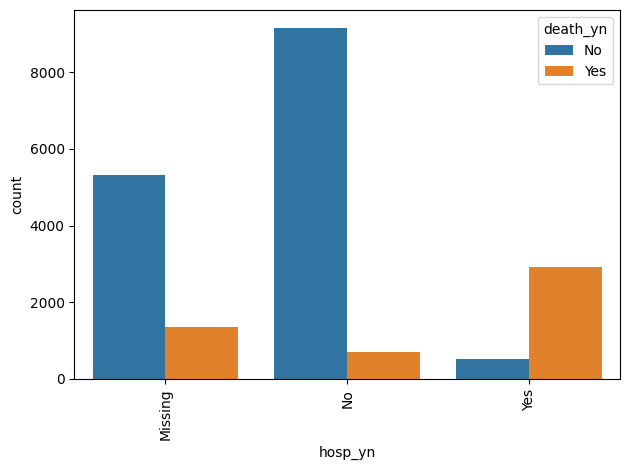

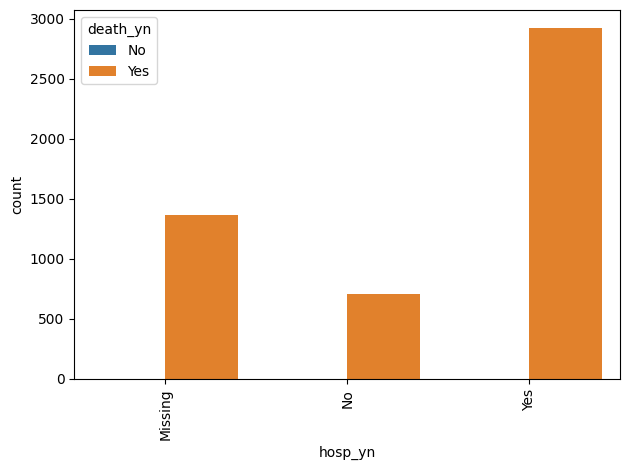

,Deaths by feature,Total by feature,Difference,Abs_Difference,Rel_Difference
Yes,58.551710,17.242586,41.309124,41.309124,3.395761
No,14.182837,49.382407,-35.199571,35.199571,0.287204
Missing,27.265453,33.375006,-6.109553,6.109553,0.816942


In [62]:
feature_death_comp("hosp_yn")

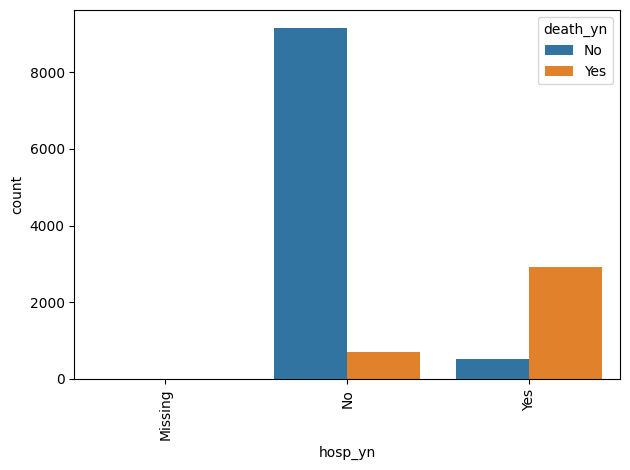

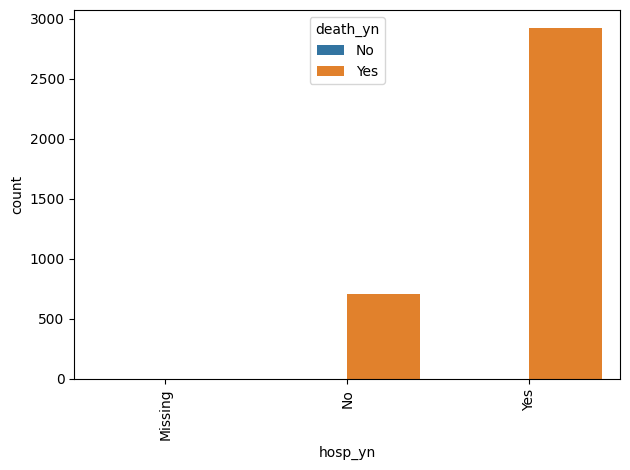

,Deaths by feature,Total by feature,Difference,Abs_Difference,Rel_Difference
No,19.49945,74.119943,-54.620493,54.620493,0.263080
Yes,80.50055,25.880057,54.620493,54.620493,3.110524
Missing,0.00000,0.000000,0.000000,0.000000,NaN


In [63]:
feature_death_comp_no_miss("hosp_yn")

- Results:
    - People who died had No for needing hospital 20% of the time but made up 74% of the total rows.
    - This implies a strong negative correlation with death if this row had No for hosp_yn
    - People who died needed the hospital 80% of the time but only made up 26% of the total rows.
    - This implies a strong positive correlation with death if this row had Yes for hosp_yn
- This tells me that people who went to hospital were more likely to die from Covid-19 and this makes sense  because you usually only go to hospital if you need medical help.

#### 3. State and county

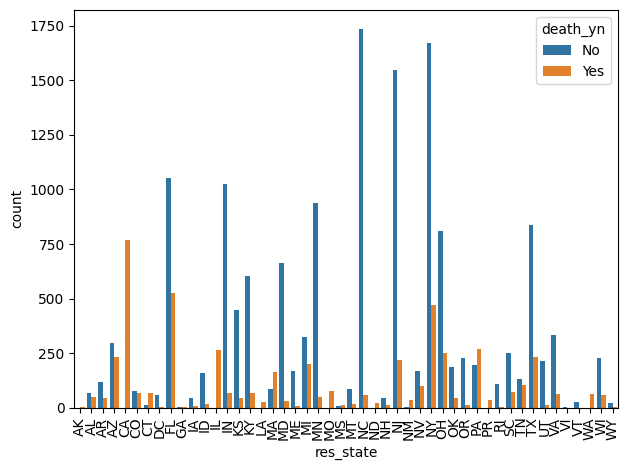

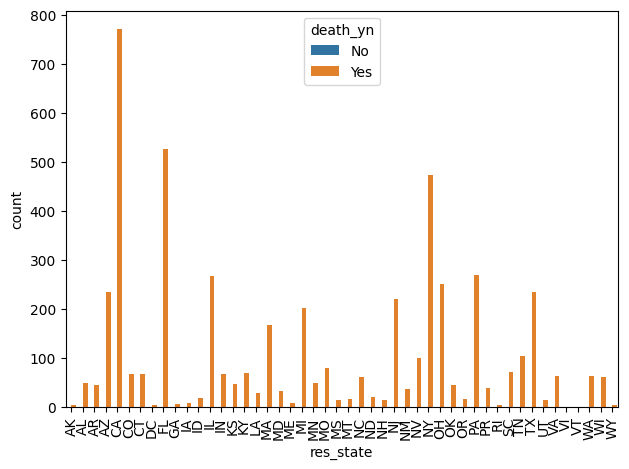

,Deaths by feature,Total by feature,Difference,Abs_Difference,Rel_Difference
CA,15.403081,3.850578,11.552503,11.552503,4.000200
NC,1.220244,8.981347,-7.761103,7.761103,0.135864
NJ,4.400880,8.836325,-4.435445,4.435445,0.498044
IN,1.340268,5.465820,-4.125552,4.125552,0.245209
IL,5.341068,1.340201,4.000867,4.000867,3.985274
MN,0.980196,4.940741,-3.960545,3.960545,0.198390
PA,5.401080,2.340351,3.060729,3.060729,2.307808
MD,0.640128,3.465520,-2.825392,2.825392,0.184713
FL,10.522104,7.891184,2.630921,2.630921,1.333400
MA,3.320664,1.270191,2.050474,2.050474,2.614304


In [64]:
feature_death_comp("res_state")

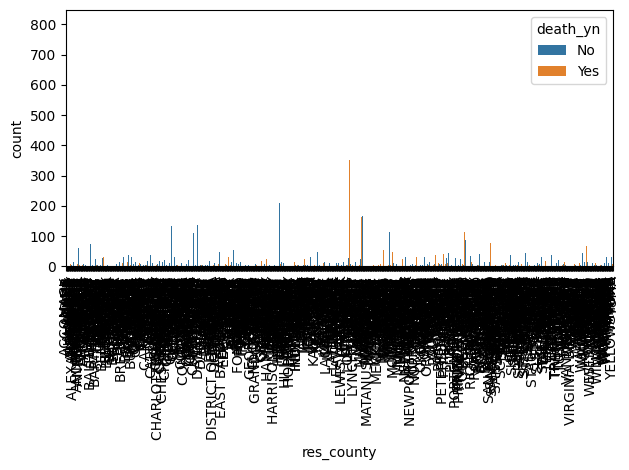

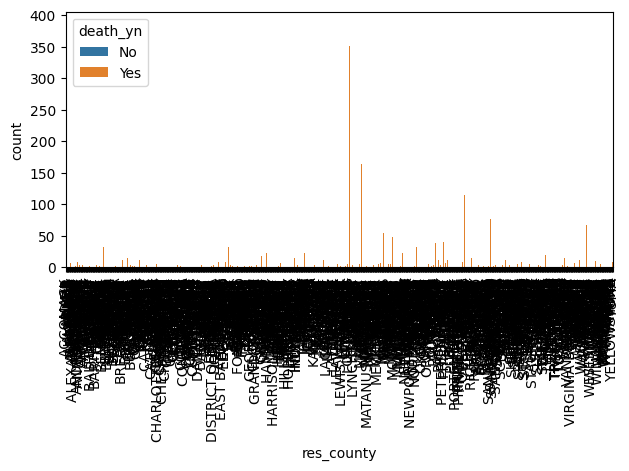

,Deaths by feature,Total by feature,Difference,Abs_Difference,Rel_Difference
LOS ANGELES,7.021404,1.755263,5.266141,5.266141,4.000200
COOK,3.360672,0.845127,2.515545,2.515545,3.976530
KINGS,2.600520,0.655098,1.945422,1.945422,3.969664
Missing,7.721544,5.965895,1.755649,1.755649,1.294281
QUEENS,2.280456,0.585088,1.695368,1.695368,3.897631
MARICOPA,3.280656,1.715257,1.565399,1.565399,1.912632
SAN BERNARDINO,1.520304,0.380057,1.140247,1.140247,4.000200
BRONX,1.320264,0.335050,0.985214,0.985214,3.940496
CLARK,2.140428,1.195179,0.945249,0.945249,1.790885
MECKLENBURG,0.080016,1.005151,-0.925135,0.925135,0.079606


In [65]:
feature_death_comp("res_county").head(10)

- Results:
    - Some states and counties have a medium correlation with the target outcome
    - Examples are:
        - Los Angeles had 7% of the total deaths but only made up 1.7% of the total rows in the data. 
        - Cook had 3.4% of the total deaths but only made up 0.85% of the total rows in the data. 
        - Kings had 2.6% of the total deaths but only made up 0.66% of the total rows in the data. 
        - This may suggest that people from these counties had a higher death risk from Covid-19 than other counties, but it may also be a result of better/worse data collection than other counties.
        - California had 15.4% of the total deaths but made up 3.8% of the total rows in the data
        - Illinois had 5.3% of the total deaths but only had 1.3% of cases
        - This may suggest that people from CA and Illinois had a higher death risk from Covid-19 than other states, but it may also be a result of better/worse data collection than other states.
        - North Carolina had only 1.2% of the total deaths but made up 9% of the total rows in the data
        - Indiana had only 1.3% of the total deaths but made up 5.5% of the total rows in the data
        - Minnesota had only 0.98% of deaths but made up 4.9% of cases	
        - This may suggest that people from NC, IN and MN had a lower death risk from Covid-19 than other states, but it may also be a result of better/worse data collection than other states.
    
- This tells me that some states and counties experienced higher mortality rates from Covid-19 than others. This may be due to a more elderly population or better/worse data collection by that state/county.

#### 4. ICU 

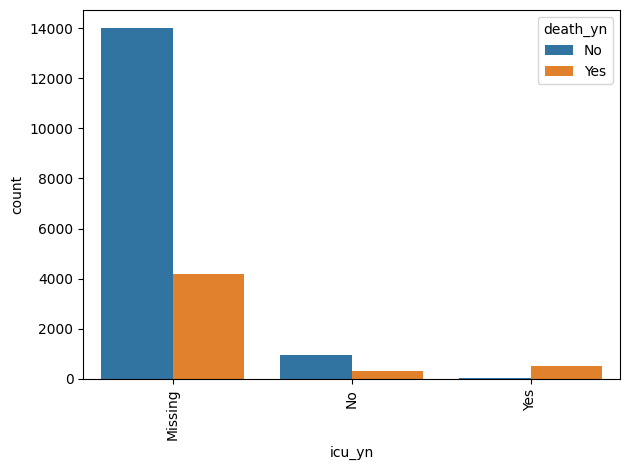

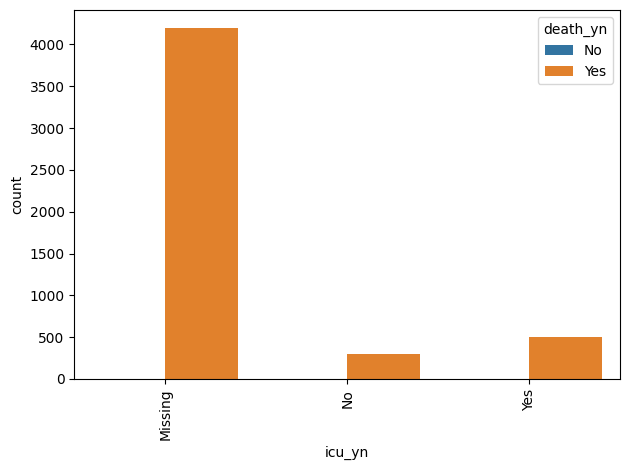

,Deaths by feature,Total by feature,Difference,Abs_Difference,Rel_Difference
Yes,9.941988,2.620393,7.321595,7.321595,3.794083
Missing,84.056811,91.118668,-7.061856,7.061856,0.922498
No,6.001200,6.260939,-0.259739,0.259739,0.958514


In [66]:
feature_death_comp("icu_yn")

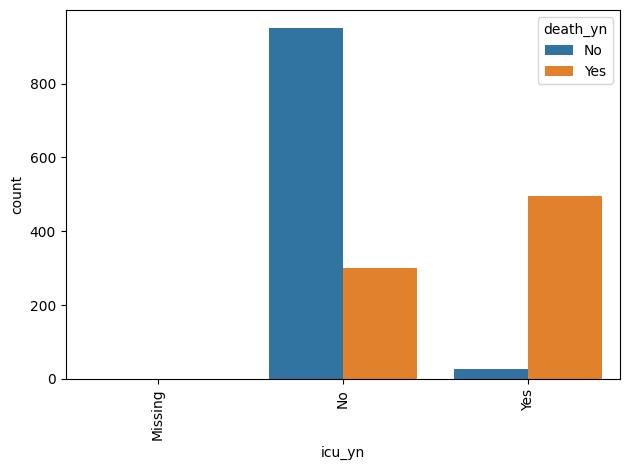

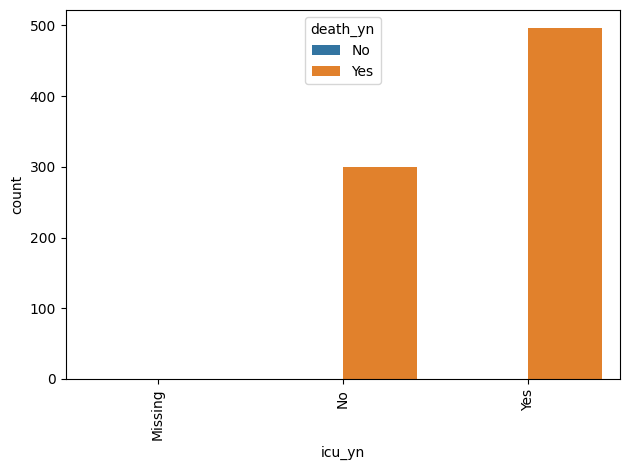

,Deaths by feature,Total by feature,Difference,Abs_Difference,Rel_Difference
No,37.641154,70.495495,-32.854341,32.854341,0.533951
Yes,62.358846,29.504505,32.854341,32.854341,2.113536
Missing,0.000000,0.000000,0.000000,0.000000,NaN


In [67]:
feature_death_comp_no_miss("icu_yn")

- Results:
    - This summary table suggests that having the icu_yn as Yes increases the death risk for that person.
    - I can see a strong positive correlation between Yes for icu_yn and Yes for death_yn 

- However due to the large amount of missing data I will not consider this feature any further due to the fact that if more data was gathered I could more reliabley interpret the correlation between icu_yn and death risk.

#### 5. Case month

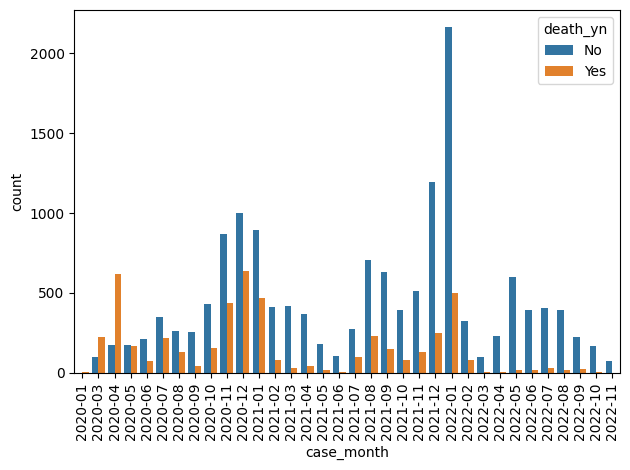

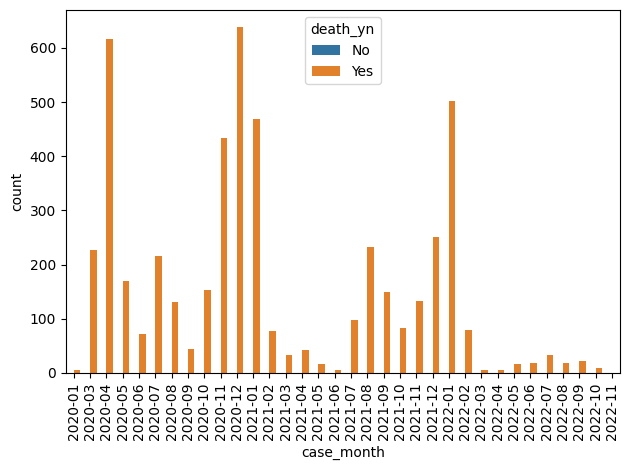

,Deaths by feature,Total by feature,Difference,Abs_Difference,Rel_Difference
2020-04,12.322464,3.955593,8.366871,8.366871,3.115200
2020-12,12.762553,8.201230,4.561322,4.561322,1.556175
2022-01,10.042008,13.326999,-3.284991,3.284991,0.753509
2020-03,4.520904,1.615242,2.905662,2.905662,2.798902
2022-05,0.340068,3.075461,-2.735393,2.735393,0.110575
2021-01,9.381876,6.821023,2.560853,2.560853,1.375435
2021-12,5.001000,7.231085,-2.230084,2.230084,0.691598
2020-11,8.681736,6.515977,2.165759,2.165759,1.332377
2020-05,3.400680,1.710257,1.690424,1.690424,1.988404
2022-08,0.360072,2.050308,-1.690236,1.690236,0.175619


In [68]:
feature_death_comp("case_month")

- Results:
    - Some months had a much higher correlation with death risk than others. 
    - By looking at the graphs above it is evident that early in 2020 there was a much higher case fatality ratio than later in the pandemic. 
    - This was probably due to a lack of testing early in the pandemic
    - Another factor might be the lack of vaccines at the start of the pandemic and the number of people in the 65+ age category being infected 
    - Some months of note:
        - 2020-04 had 12.3% of the total deaths but only made up 4% of the total cases.
        - 2020-03 had 4.5% of the total deaths but only made up 1.6% of the total cases.
        - 2020-12 had 12.8% of the total deaths but only made up 8% of the total cases.
        - Thes months had very high death:case ratios. This may have been due to the factors mentioned above.
        - 2022-05 had only 0.34% of the total deaths but made up 3% of the total cases.
        - A reason for this may be that Covid-19 became less fatal as it mutated into different variants and the elderly people in the population had had the opportunity to be vaccinated.

- In conclusion the month in which the person acquired the virus does have a strong correlation with death risk.

### Results of Part 3:

- Categorical vs Categorical
    - The cleaned dataset consisted entirely of categorical features.
    - Analysis has shown that the features below have a strong correlation with the target outcome of death_yn= Yes:
        - age_group: 88% of deaths were in the 65+ years age group. This is therfeore a strong predictor of death.
        - hosp_yn: 80% of the people who died went to hospital. Another strong predictor of death.
        - case_month: There were more deaths compared to case numbers for the months of 2020 in comparison with 2021. Some months had very high death percentages. An example is April 2020 when there was 12.3% of total deaths in that one month even though it only makes up 4% of total cases.
        - res_state/county: Some states and counties had a stronger correlation with the target outcome than others. For example California had 15.4% of the total deaths but only had 3.8% of the total cases.

## Part 4 Transform, extend or combine the existing features to create a few new features (at least 3) 
The aim of this is to better capture the problem domain and the target outcome.

- Ideas:
    - new feature that combines age_group>65 and hosp_yn. Either yes to both or no
    - new feature that displays the number of deaths in the month which that person had covid
    - california/illionois/new york and florida  yes or no column? as these 4 states make up 40.7% of deaths
    - case_month before/during+after feb 2021 as lots of deaths were before this 

## Creation of new features
### 1. high_risk_category: hosp_yn=Yes and age_group=65+ years

- high_risk_category= hosp_yn= Yes and age_group is 65+ years
- Was this person hospitilized and were they older than 65?
    - Yes if true
    - To do this create binary(yes/no) encoding for in 65+ age group or not

In [69]:
df_clean_final = df_clean.copy() # create a copy of the cleamed dataframe
df_clean_final['high_risk_category'] = np.where((df_clean_final["age_group"] == "65+ years") & (df_clean_final["hosp_yn"] == "Yes"), "Yes", "No")
df_clean_final['high_risk_category']


0        Yes
1        Yes
2        Yes
3         No
4         No
        ... 
19993     No
19994     No
19995     No
19996     No
19997     No
Name: high_risk_category, Length: 19997, dtype: object

### 2. before_feb_2021
- before_feb_2021= case_month<2021_02
- If somone had covid before February of 2021 they were more likely to die from it
    - Get case fatality ratio before and after this month for all age groups 

In [70]:
#to do this convert to continuous feature of type int
# remove the -
df_clean_final["case_month"]=df_clean_final["case_month"].str.replace('-', '')
#convert to int
df_clean_final["case_month"]=df_clean_final["case_month"].astype(int)


In [71]:

df_clean_final['before_feb_2021'] = np.where((df_clean_final["case_month"]<202102), "Yes", "No")
#df_clean_final.head(50)


### 3. deaths_in_current_month
- This feature will tell us how many people in this dataset died from Covid-19 in the month in which this person also had Covid-19
- If this number is high for a given row it is more likely that they died from Covid-19 as it indicates which months had the most deaths.

In [72]:
df_clean_final["deaths_in_current_month"]=df_clean.groupby([df_clean.case_month])['case_month'].transform('size')


In [73]:
df_clean_final.tail(10)

,case_month,res_state,res_county,age_group,sex,race,ethnicity,current_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn,high_risk_category,before_feb_2021,deaths_in_current_month
19988,202012,MD,CALVERT,18 to 49 years,Male,Missing,Missing,Probable Case,Missing,Missing,No,Missing,No,Yes,1640
19989,202210,NJ,MORRIS,65+ years,Female,White,Non-Hispanic/Latino,Laboratory-confirmed case,No,Missing,No,Missing,No,No,174
19990,202108,MI,GENESEE,18 to 49 years,Female,White,Non-Hispanic/Latino,Laboratory-confirmed case,No,Missing,No,Missing,No,No,937
19991,202201,NC,Missing,50 to 64 years,Female,Black,Non-Hispanic/Latino,Probable Case,No,Missing,No,Yes,No,No,2665
19992,202208,OH,BUTLER,18 to 49 years,Male,White,Non-Hispanic/Latino,Laboratory-confirmed case,Missing,Missing,No,Missing,No,No,410
19993,202010,FL,PINELLAS,65+ years,Female,White,Hispanic/Latino,Laboratory-confirmed case,No,Missing,No,Missing,No,Yes,585
19994,202201,WI,MARATHON,0 - 17 years,Male,White,Hispanic/Latino,Laboratory-confirmed case,No,Missing,No,Missing,No,No,2665
19995,202201,NY,ONTARIO,18 to 49 years,Female,White,Non-Hispanic/Latino,Laboratory-confirmed case,Missing,Missing,No,Missing,No,No,2665
19996,202101,TX,WILLIAMSON,18 to 49 years,Male,Missing,Missing,Laboratory-confirmed case,No,Missing,No,Missing,No,Yes,1364
19997,202007,TN,DAVIDSON,50 to 64 years,Female,White,Non-Hispanic/Latino,Laboratory-confirmed case,No,No,No,Yes,No,Yes,567


### 4. high_risk_state:
- If the person is from NY, CA, IL or FL then this will return yes 
- This feature is useful as these 4 states contain 40.7% of the total deaths but only 23.7% of the cases

In [74]:
df_clean_final['high_risk_state'] = np.where((df_clean_final["res_state"] == "CA") | (df_clean_final["res_state"] == "NY") | (df_clean_final["res_state"] == "IL") | (df_clean_final["res_state"] == "FL"), "Yes", "No")
df_clean_final['high_risk_state']

0        Yes
1         No
2         No
3         No
4         No
        ... 
19993    Yes
19994     No
19995    Yes
19996     No
19997     No
Name: high_risk_state, Length: 19997, dtype: object

In [75]:
columns=df_clean_final[['high_risk_category','before_feb_2021','high_risk_state']].columns
for column in columns:
    df_clean_final[column] = df_clean_final[column].astype('category') 
df_clean_final.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 19997 entries, 0 to 19997
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   case_month                19997 non-null  int64   
 1   res_state                 19997 non-null  category
 2   res_county                19997 non-null  category
 3   age_group                 19997 non-null  category
 4   sex                       19997 non-null  category
 5   race                      19997 non-null  category
 6   ethnicity                 19997 non-null  category
 7   current_status            19997 non-null  category
 8   hosp_yn                   19997 non-null  category
 9   icu_yn                    19997 non-null  category
 10  death_yn                  19997 non-null  category
 11  underlying_conditions_yn  19997 non-null  category
 12  high_risk_category        19997 non-null  category
 13  before_feb_2021           19997 non-null  cate

In [76]:
df_clean_final.head(10)

,case_month,res_state,res_county,age_group,sex,race,ethnicity,current_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn,high_risk_category,before_feb_2021,deaths_in_current_month,high_risk_state
0,202101,FL,DUVAL,65+ years,Male,Black,Non-Hispanic/Latino,Laboratory-confirmed case,Yes,Missing,Yes,Missing,Yes,Yes,1364,Yes
1,202012,ID,ADA,65+ years,Male,White,Non-Hispanic/Latino,Laboratory-confirmed case,Yes,No,Yes,Missing,Yes,Yes,1640,No
2,202201,NV,CLARK,65+ years,Male,White,Hispanic/Latino,Laboratory-confirmed case,Yes,Missing,Yes,Yes,Yes,No,2665,No
3,202003,LA,Missing,Missing,Missing,Missing,Missing,Laboratory-confirmed case,Yes,Yes,Yes,Yes,No,Yes,323,No
4,202101,KS,JOHNSON,65+ years,Male,White,Non-Hispanic/Latino,Probable Case,Missing,Missing,Yes,Missing,No,Yes,1364,No
5,202008,FL,LEE,65+ years,Male,White,Non-Hispanic/Latino,Laboratory-confirmed case,Missing,Missing,Yes,Missing,No,Yes,394,Yes
6,202012,TX,BEXAR,65+ years,Female,White,Non-Hispanic/Latino,Laboratory-confirmed case,Yes,Missing,Yes,Missing,Yes,Yes,1640,No
7,202209,OH,CUYAHOGA,65+ years,Female,White,Non-Hispanic/Latino,Laboratory-confirmed case,Missing,Missing,Yes,Missing,No,No,246,No
8,202004,NY,BRONX,50 to 64 years,Male,White,Non-Hispanic/Latino,Probable Case,Missing,Missing,Yes,Yes,No,Yes,791,Yes
9,202011,AR,Missing,65+ years,Female,White,Non-Hispanic/Latino,Laboratory-confirmed case,Missing,Missing,Yes,Missing,No,Yes,1303,No


## Check to see if the new features are useful for predicting the target outcome:

In [77]:
#encode using dummy encoding
df_clean_final_encoded=pd.get_dummies(df_clean_final)

In [78]:
#See how the new features compare with others
df_clean_final_encoded_corr=df_clean_final_encoded.corr()

print("10 Greatest Positive Correlations to Death = Yes" + "\n",df_clean_final_encoded_corr["death_yn_Yes"].sort_values(ascending=False).head(10))

10 Greatest Positive Correlations to Death = Yes
 death_yn_Yes              1.000000
age_group_65+ years       0.715807
hosp_yn_Yes               0.631344
high_risk_category_Yes    0.617864
res_state_CA              0.346629
before_feb_2021_Yes       0.282999
icu_yn_Yes                0.264614
res_county_LOS ANGELES    0.231522
high_risk_state_Yes       0.229432
res_state_IL              0.200874
Name: death_yn_Yes, dtype: float64


- As you can see 3 of my new features have a high correlation with the target outcome
- The deaths_in_current_month feature doesn't appear as the month is not as strong an indicator of death.

In [82]:
#export to csv
df_clean_final.to_csv('final_cleaned_covid19-cdc-19321726.csv', index=False)